<hr>

#### <strong>第一次作品：探索機率分配、隨機樣本與抽樣分配的樣貌</strong>

學號：411278015

姓名：王欣霖

<hr>

 **<font color=darkgoldenrod>作品目標</font>**：

1. 繪製下列連續型分配的 PDF 函數：
    - Normal、T、Chi-square、Exponential、Beta、Gamma、F。利用改變分配函數的參數，觀察其分配函數的「樣貌」；畫出所有可能的「形狀」並說明（或標示）與參數間的關係。
    - 將不同參數的 PDF 函數畫在同一張圖，或選擇切割畫面（subplot）以應付不同參數的表現。
    - 也可以加入離散型分配的 PMF 函數（例如 Binomial、Poisson、Geometric、Negative Binomial 等）。
1. 繪製隨機樣本：從前述的每個分配中（各挑一組參數）產生 N 個隨機樣本
    - 繪製直方圖（Histogram）、盒鬚圖（Boxplot）、常態機率圖（Normal Probability plot）、經驗累積機率函數（Empirical CDF）。將四張圖繪製在 2x2 的子圖上。
    - 樣本數 $n$ 自訂，建議選擇不同大小的 $n$ 以展現樣本數對圖形產生的影響。
  
1. (optional) 製作三個抽樣分配（Sampling Distribution）的相關圖形：
    - 例如 $Y = X^2, X \sim N(0,1)$，畫出 $Y$ 的直方圖、盒鬚圖、propability plot 、Empirical CDF。
    - 其他兩個抽樣分配可參考課本或講義內容，譬如 
        - $Y = X_1 + X_2$，其中 $X_1 \sim \chi^2(2), X_2 \sim \chi^2(4)$；
        - $F = \frac{U/r_1}{V/r_2}$，其中 $U \sim \chi^2(r_1), V\sim \chi^2(r_2)$；
        - $T = \frac{Z}{\sqrt{U/r}}=\frac{\overline{x}-{\mu}}{s/\sqrt{n}} \sim t(n-1)$，其中 $Z \sim N(0,1), U \sim \chi^2(r)$
    - 也可以製作中央極限定理（Central Limit Theorem, CLT）的抽樣分配。


<hr>

**<font color=darkgoldenrod>預先載入套件與函數：</font>**

In [18]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.widgets import Slider, CheckButtons
import matplotlib

# 設定支援中文的字體
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False  # 處理負號顯示問題
%config InlineBackend.figure_format = 'retina'

**<font color=darkgoldenrod>1：繪製分配函數</font>**

1.1 常態分配（Normal Distributions）

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}},\; -\infty < x < \infty$$

繪製不同 $\mu$ 與 $\sigma$ 對常態分配 PDF 的變化
 - 固定 $\sigma = 1$，改變 $\mu = 1, 2, 3, 4, 5$
 - 固定 $\mu = 0$，改變 $\sigma = 1, 2, 3, 4, 5$

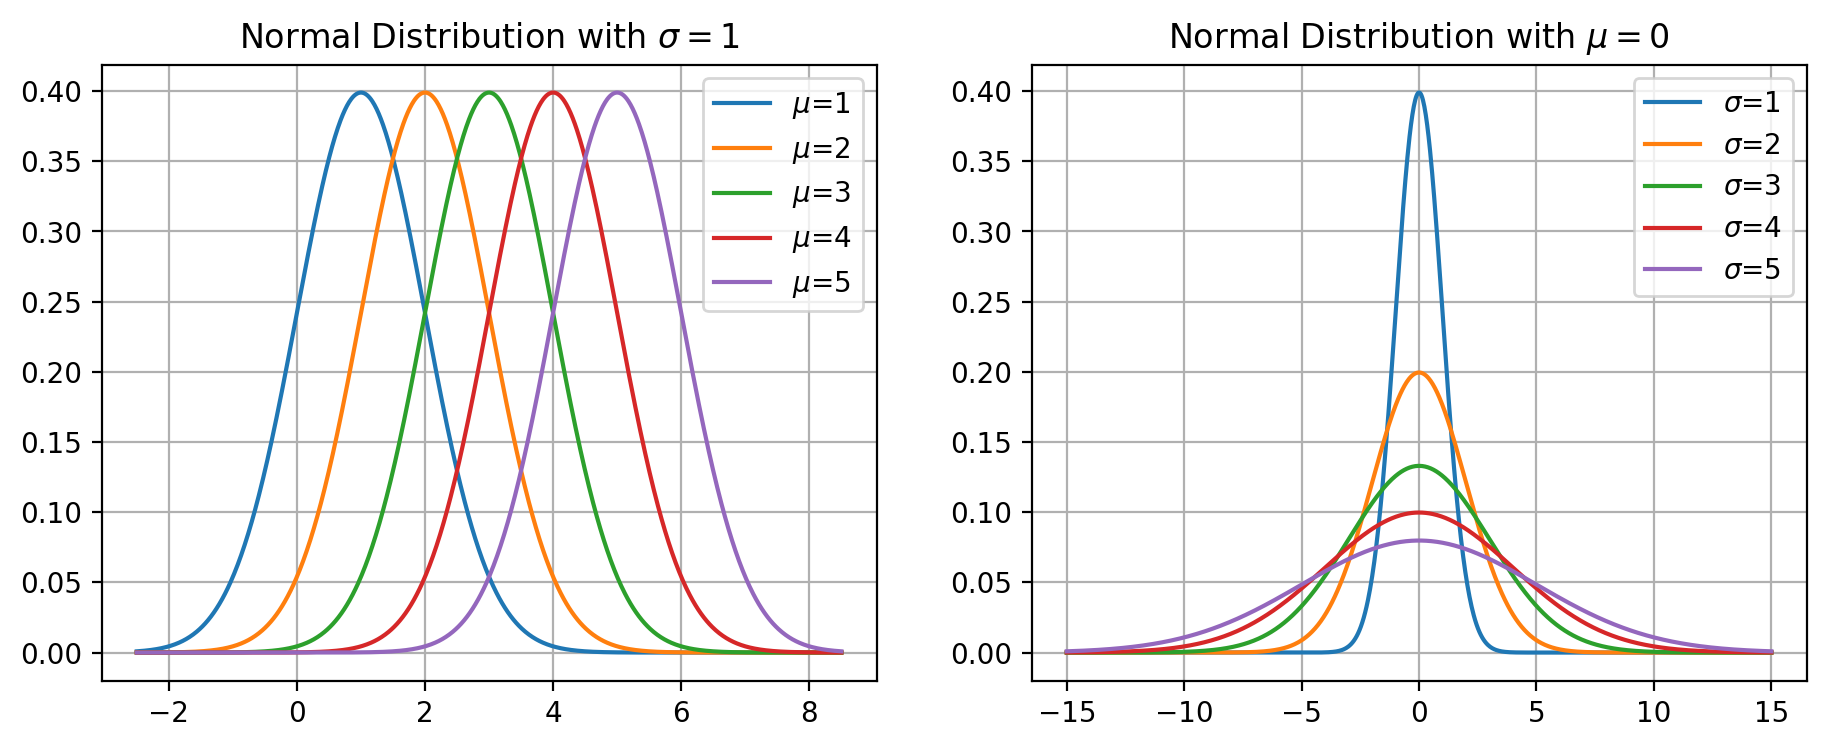

In [42]:
# 繪製常態分配
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))
xlim = [-2.5, 8.5]
sigma = 1
#x_left, x_right = -5, 15|
mu = np.arange(1, 6)
x = np.linspace(xlim[0], xlim[1], 1000)
Y = stats.norm.pdf(x.reshape(-1, 1), mu, sigma) # broadcasting
label = [r"$\mu$={}".format(i) for i in mu] # list comprehension
ax[0].plot(x, Y, label=label)
ax[0].legend()
ax[0].grid()
ax[0].set_title(r"Normal Distribution with $\sigma=${}".format(sigma))

xlim = [-15, 15] # 範圍配合 sigma 最大值
mu = 0
s = np.arange(1, 6)
x = np.linspace(xlim[0], xlim[1], 1000)
Y = stats.norm.pdf(x.reshape(-1, 1), mu, s)
label = [r"$\sigma$={}".format(i) for i in s]
ax[1].plot(x, Y, label=label)
ax[1].legend()
ax[1].grid()
ax[1].set_title(r"Normal Distribution with $\mu=${}".format(mu))
plt.show()

**<font color=skyblue>注意事項與討論：</font>**
- 考慮 x 值的範圍，才能完整呈現常態分配圖形該有的樣貌。
- 練習利用非迴圈的矩陣計算方式（Broadcasting 技術）繪圖。
- x.reshape(-1, 1) 轉換 x 向量的形式。
- label 部分選擇用 list comprehension 來加入標籤。

<hr>

1-2 t Distribution
$$
f(t) = \frac{\Gamma\!\left(\tfrac{\nu+1}{2}\right)}{\sqrt{\nu \pi}\,\Gamma\!\left(\tfrac{\nu}{2}\right)}
\left(1 + \frac{t^2}{\nu}\right)^{-\tfrac{\nu+1}{2}},\quad -\infty<t<\infty
$$



改變 T 分配的自由度： df = $1, 5, 10, 20, 30, 40, 60, 200$

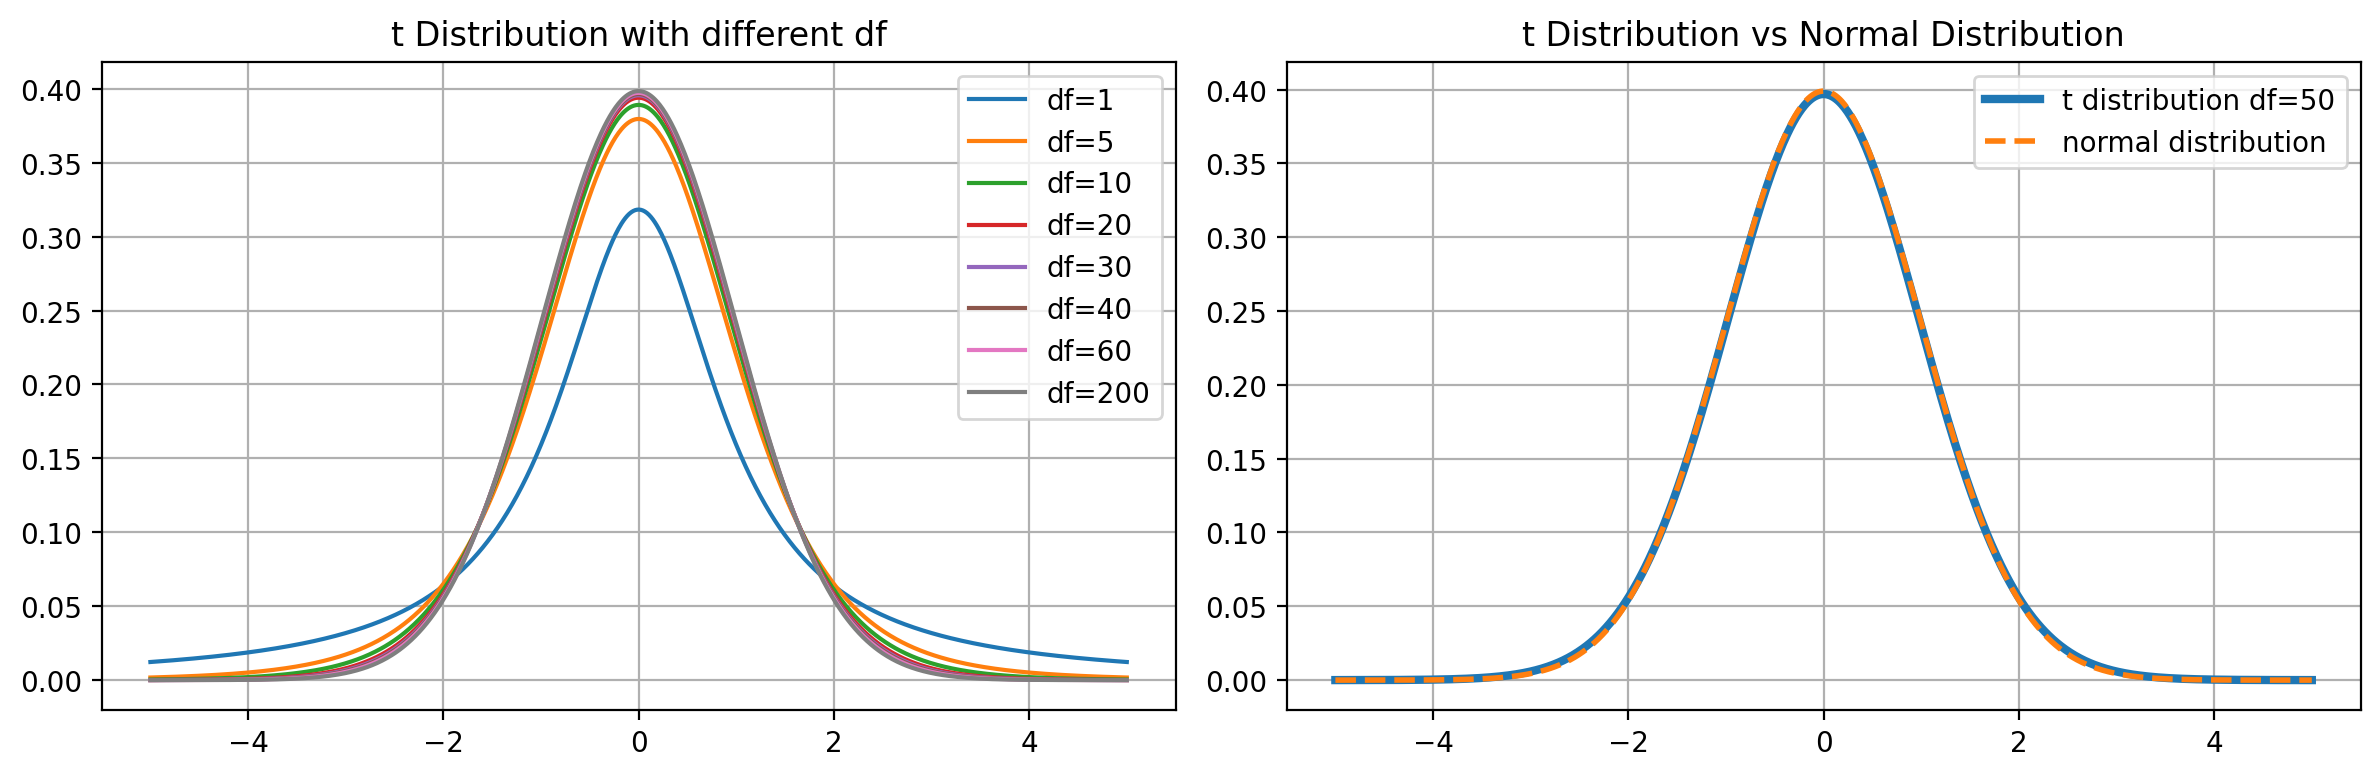

In [52]:
# 並排繪製 t 分配與 t vs Normal 分配
df = [1, 5, 10, 20, 30, 40, 60, 200]
x_left, x_right = -5, 5
n = 1000
x = np.linspace(x_left, x_right, n)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# 左圖：不同 df 的 t 分配（逐條畫，確保標籤正確對應）
for d in df:
    ax[0].plot(x, stats.t.pdf(x, d), label=f"df={d}")
ax[0].legend()
ax[0].grid(True)
ax[0].set_title("t Distribution with different df")

# 右圖：t(df=50) vs Normal 分配（Normal 用虛線＋降透明度）
Y1 = stats.t.pdf(x, 50)       # t 分配
Y2 = stats.norm.pdf(x)        # 常態分配 (μ=0, σ=1)
ax[1].plot(x, Y1, label="t distribution df=50", linewidth=3.0)
ax[1].plot(x, Y2, linestyle='--', linewidth=2.0, alpha=1, label="normal distribution")  # ← 虛線＋透明
ax[1].legend()
ax[1].grid(True)
ax[1].set_title("t Distribution vs Normal Distribution")

plt.tight_layout()
plt.show()

**<font color=skyblue>注意事項與討論：</font>**
- 自由度 df 對 t 分配的影響：

- 當 df 很小（如 1），t 分配的尾部較厚（heavy tail），比常態分配更容易出現極端值。
  隨著 df 增加，t 分配逐漸趨近於標準常態分配（df → ∞ 時，t 分配即為常態分配）。
  圖中可明顯看到 df=1 時曲線最扁、尾巴最厚，df 越大曲線越尖、越接近常態分配。
  應用情境：

- t 分配常用於小樣本推論（如 t 檢定），當樣本數大時可直接用常態分配。
  繪圖技巧：

- 利用 broadcasting 與 x.reshape(-1, 1)，可一次計算多組參數，避免 for 迴圈，提升效率。
  標籤用 list comprehension 產生，方便維護。
  

- x 軸範圍要涵蓋所有分配的主要區域，否則尾部特性不明顯。
  畫多條線時，label 要清楚標示參數，方便比較。

<hr>

1-3 &chi;&sup2; Distribution

$$f(x) = \frac{1}{\Gamma(\frac{r}{2})2^{\frac{r}{2}}}x^{\frac{r}{2}-1}e^{-\frac{x}{2}},\; 0 < x < \infty\;\;;\;\; {\mu} = r\;\;;\;\; {\sigma^2} = 2r$$

繪製不同自由度 $r$，卡方分配的樣貌，自由度 $r$ 分別為 1, 2, 3, 4, 5, 7, 10, 15, 20, 30

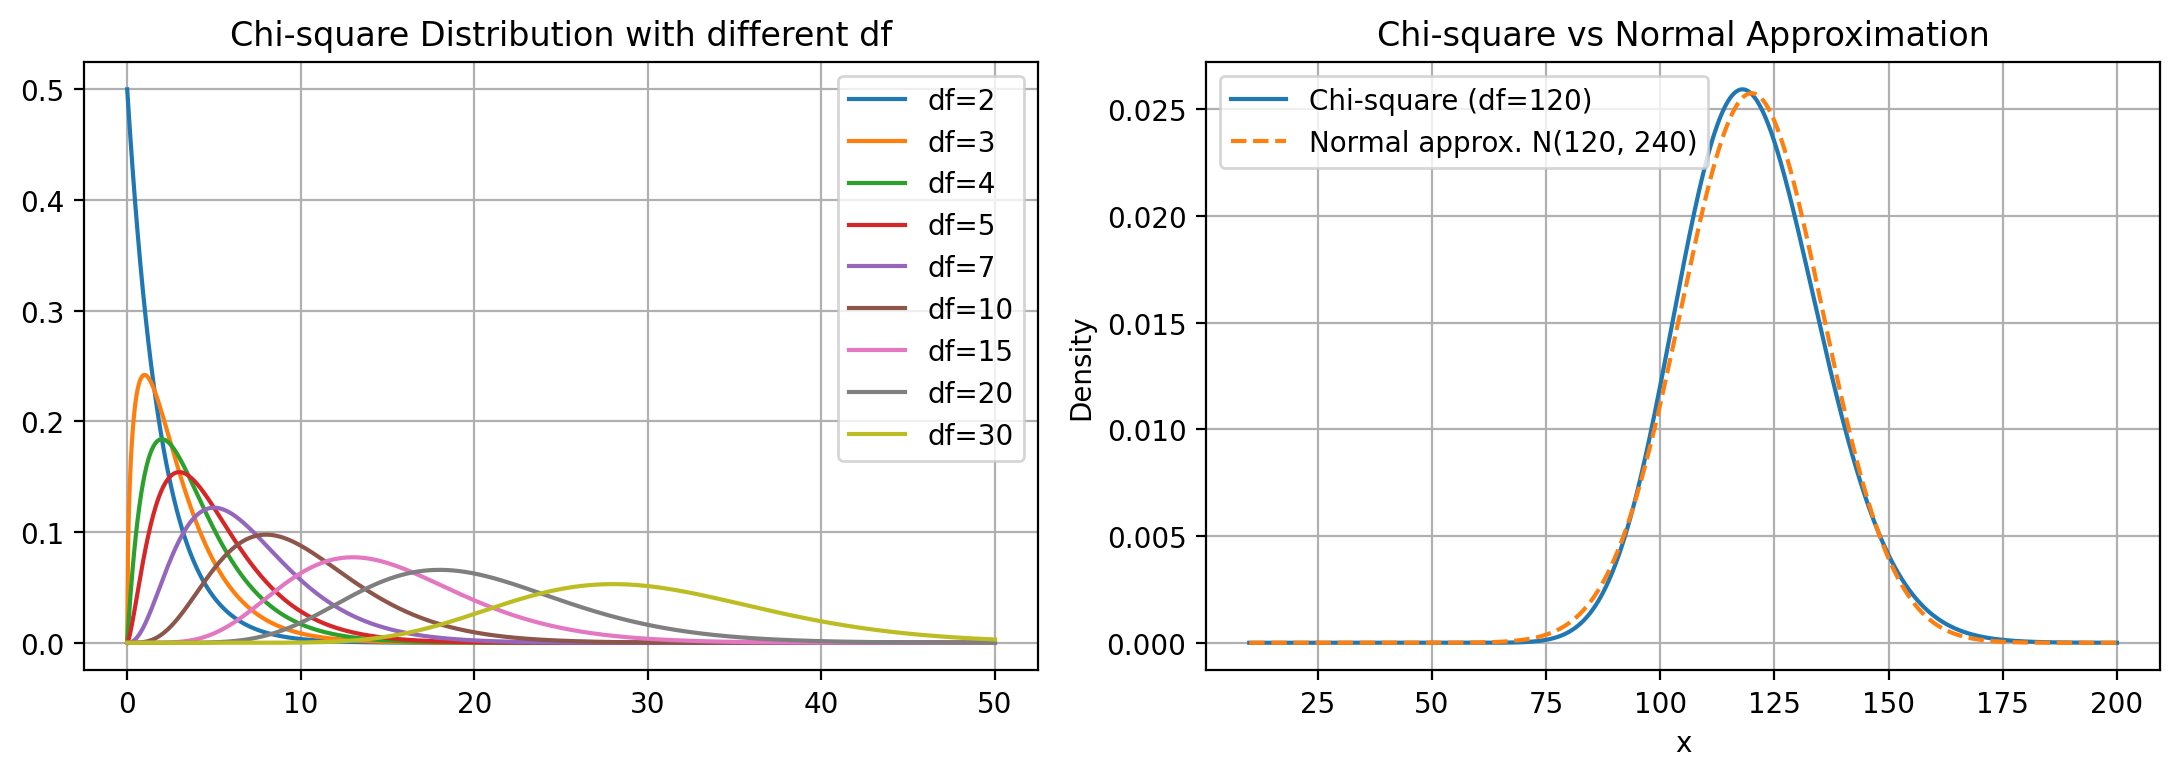

In [44]:
# 繪製 chi-square 分配 並取自由度分別為 2, 3, 4, 5, 7, 10, 15, 20, 30
# 第一張圖：不同自由度的卡方分配
df_list = [2, 3, 4, 5, 7, 10, 15, 20, 30]
x_left, x_right = 0, 50
n = 1000
x1 = np.linspace(x_left, x_right, n)
Y = stats.chi2.pdf(x1.reshape(-1, 1), df_list)
label = [f"df={i}" for i in df_list]

# 第二張圖：大自由度卡方分配與常態分配比較
df2 = 120
x2 = np.linspace(10, 200, 1000)
Y1 = stats.chi2.pdf(x2, df2)
mu = df2
sigma = np.sqrt(2 * df2)
Y2 = stats.norm.pdf(x2, mu, sigma)

# 建立並排子圖
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# 左圖
ax[0].plot(x1, Y, label=label)
ax[0].legend()
ax[0].grid()
ax[0].set_title("Chi-square Distribution with different df")

# 右圖
ax[1].plot(x2, Y1, label=f"Chi-square (df={df2})")
ax[1].plot(x2, Y2, label=f"Normal approx. N({mu}, {round(sigma**2)})", linestyle="--")
ax[1].legend()
ax[1].grid()
ax[1].set_title("Chi-square vs Normal Approximation")
ax[1].set_xlabel("x")
ax[1].set_ylabel("Density")

plt.tight_layout()
plt.show()

**<font color=skyblue>注意事項與討論：</font>**
- **卡方分配屬於右偏分配（right-skewed distribution）**
  - 自由度 \( df \) 越小，偏態程度越明顯。
  - 這反映在密度函數高峰靠近 0，尾部延伸向右的長尾現象。

- **分配的定義域為：**
  $$
  X \in [0, \infty)
  $$
  因為卡方分配是標準常態變數平方和之總和，理論上不可能為負值。

- **自由度增加時，卡方分配趨近常態分配：**

  根據中央極限定理（Central Limit Theorem）：

  $$chi^2_{df} \xrightarrow{d} \mathcal{N}(df, 2df), \quad \text{當 } df \to \infty$$

- **機率密度函數的高峰（Mode）位置隨自由度右移：**
  $$
  {Mode} =
  \begin{cases}
  0, & \text{若 } df \leq 2 \\
  df - 2, & \text{若 } df > 2
  \end{cases}
  $$

- **自由度小時具有重尾（heavy-tailed）特性：**
  - 極端大值的機率不容忽視，可能影響統計檢定結果。

- **自由度越大，尾部收斂越快，分布趨向對稱、光滑。**

<hr>

1-4 Exponential Distribution
$$
f(x;\lambda) =
\begin{cases}
\lambda e^{-\lambda x}, & x \geq 0, \\
0, & x < 0.
\end{cases}
$$

改變$\lambda$，$\lambda$ 分別為 0.5, 1, 1.5, 2, 3

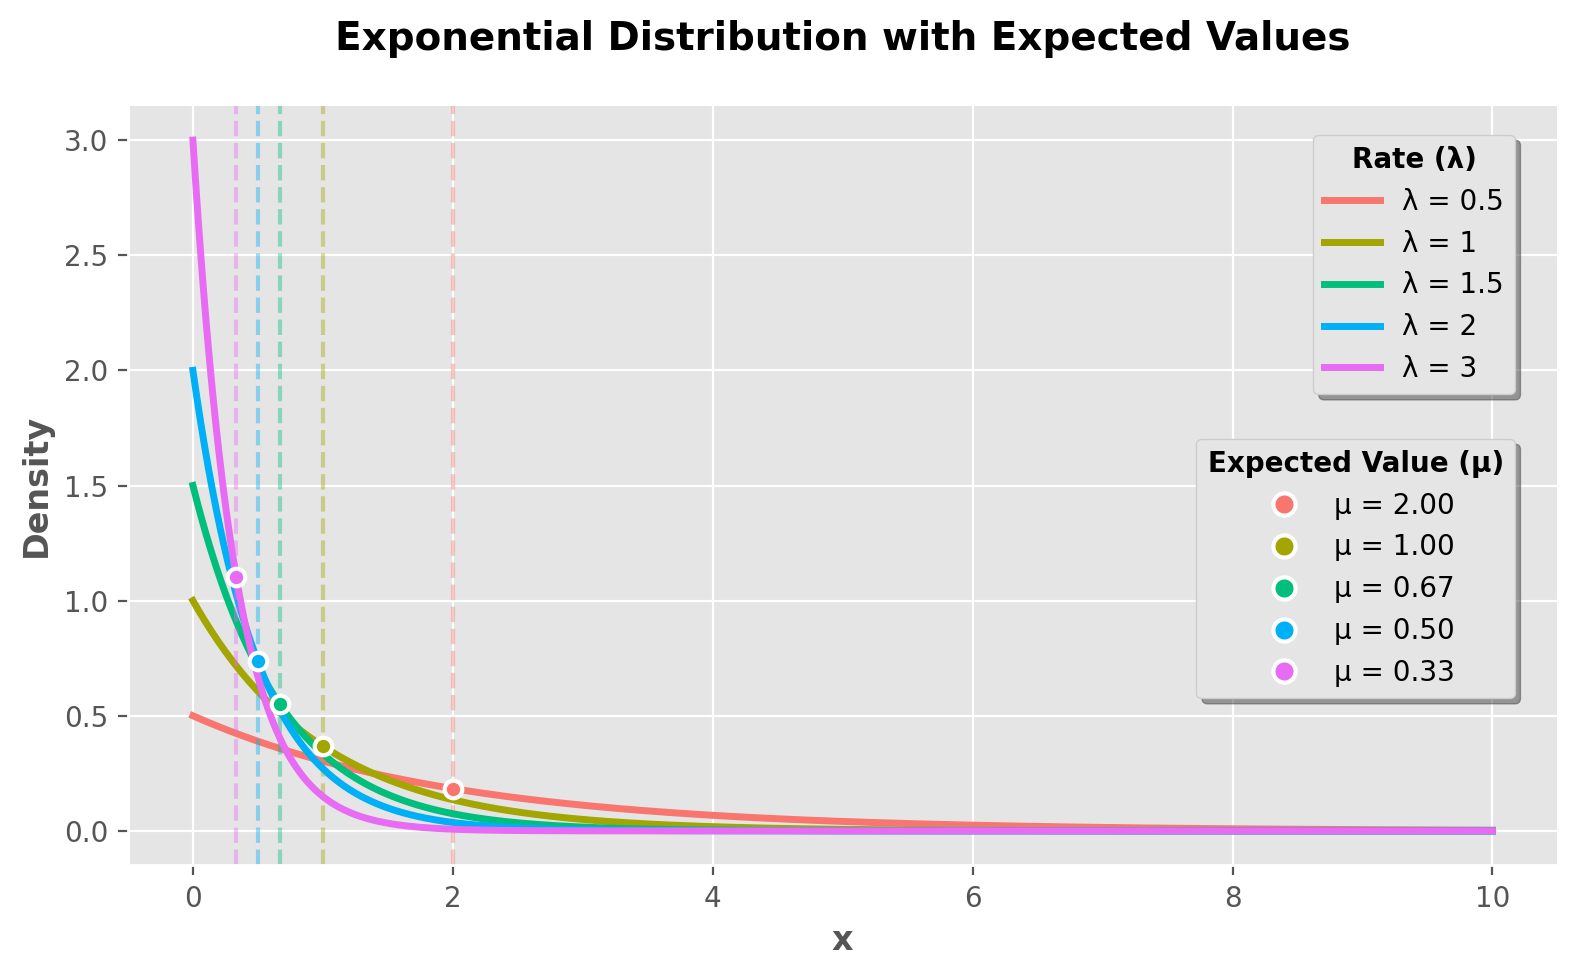

In [2]:
# 使用 ggplot 風格繪製 Exponential Distribution
plt.style.use('ggplot')

lambd = [0.5, 1, 1.5, 2, 3]
x = np.linspace(0, 10, 1000)

fig, ax = plt.subplots(figsize=(8, 5))
# ggplot 風格的調色盤
colors = ['#F8766D', '#A3A500', '#00BF7D', '#00B0F6', '#E76BF3']

line_handles, mean_handles = [], []

for i, (c, lam) in enumerate(zip(colors, lambd)):
    mu = 1 / lam
    y = stats.expon.pdf(x, scale=mu)

    # 主曲線 (λ) - 較粗的線條
    line, = ax.plot(x, y, color=c, linewidth=2.5, label=rf"λ = {lam}")
    line_handles.append(line)

    # 均值點 + 輔助虛線
    ax.axvline(mu, color=c, linestyle='--', linewidth=1.5, alpha=0.4)
    ax.scatter(mu, stats.expon.pdf(mu, scale=mu), color=c, s=40, 
               edgecolors='white', linewidth=1.5, zorder=5)

    # μ 的 legend 只用點表示
    mean_handles.append(Line2D([0], [0], marker='o', color='none',
                               markerfacecolor=c, markersize=8, 
                               markeredgecolor='white', markeredgewidth=1.5,
                               label=rf"μ = {mu:.2f}"))

# ggplot 風格的圖例
leg1 = ax.legend(handles=line_handles, title="Rate (λ)", 
                 loc="upper right", bbox_to_anchor=(0.98, 0.98),
                 frameon=True, fancybox=True, shadow=True)
leg1.get_title().set_fontweight('bold')

leg2 = ax.legend(handles=mean_handles, title="Expected Value (μ)",
                 loc="upper right", bbox_to_anchor=(0.98, 0.58),
                 frameon=True, fancybox=True, shadow=True)
leg2.get_title().set_fontweight('bold')

# 把第一個 legend 放回畫布
ax.add_artist(leg1)

# ggplot 風格的標題和標籤
ax.set_title("Exponential Distribution with Expected Values", 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel("x", fontsize=12, fontweight='bold')
ax.set_ylabel("Density", fontsize=12, fontweight='bold')

# 移除頂部和右側的邊框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# 重置樣式到預設值
plt.style.use('default')


**<font color=skyblue>注意事項與討論：</font>**

**ggplot 風格特色：**
- **現代化視覺風格**：灰色背景網格、清爽的配色方案，符合現代數據視覺化趨勢
- **專業調色盤**：使用 R ggplot2 經典配色 `['#F8766D', '#A3A500', '#00BF7D', '#00B0F6', '#E76BF3']`，每種顏色都經過視覺優化
- **簡潔邊框設計**：移除頂部和右側邊框，讓圖形更加簡潔專業

**參數與分布關係：**
- **λ（速率參數）與 μ（期望值）的反比關係**：μ = 1/λ，當 λ 增大時，分布衰減更快，期望值更小
- **視覺化對應**：每個 λ 值都有對應顏色的曲線和均值點，便於觀察參數變化對分布形狀的影響
- **指數分布記憶性質**：P(X > s+t | X > s) = P(X > t)，常用於建模「等待時間」或「生存分析」

**繪圖技術亮點：**
- **雙圖例設計**：分別展示曲線參數(λ)和統計量(μ)，避免圖例過於擁擠
- **Layer 層次**：虛線輔助線(alpha=0.4) → 主曲線 → 均值點(zorder=5)，建立清晰的視覺層次
- **白色邊框點**：`edgecolors='white'` 讓散點在灰色背景下更突出

**統計意義：**
- **λ=0.5 時**：μ=2.0，分布較平緩，適合描述長期等待事件
- **λ=3 時**：μ=0.33，分布急劇下降，適合描述短期突發事件
- **實際應用**：電話呼入間隔、設備故障時間、網頁訪問間隔等

**程式設計考量：**
- **樣式管理**：`plt.style.use('ggplot')` 和最後的 `plt.style.use('default')` 確保不影響後續圖形
- **可重用性**：顏色、參數都用列表定義，易於修改和擴展

<hr>

1-5 Beta Distribution
$$
f(x;\alpha,\beta) =
\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}
x^{\alpha-1}(1-x)^{\beta-1},
\quad 0 < x < 1
$$

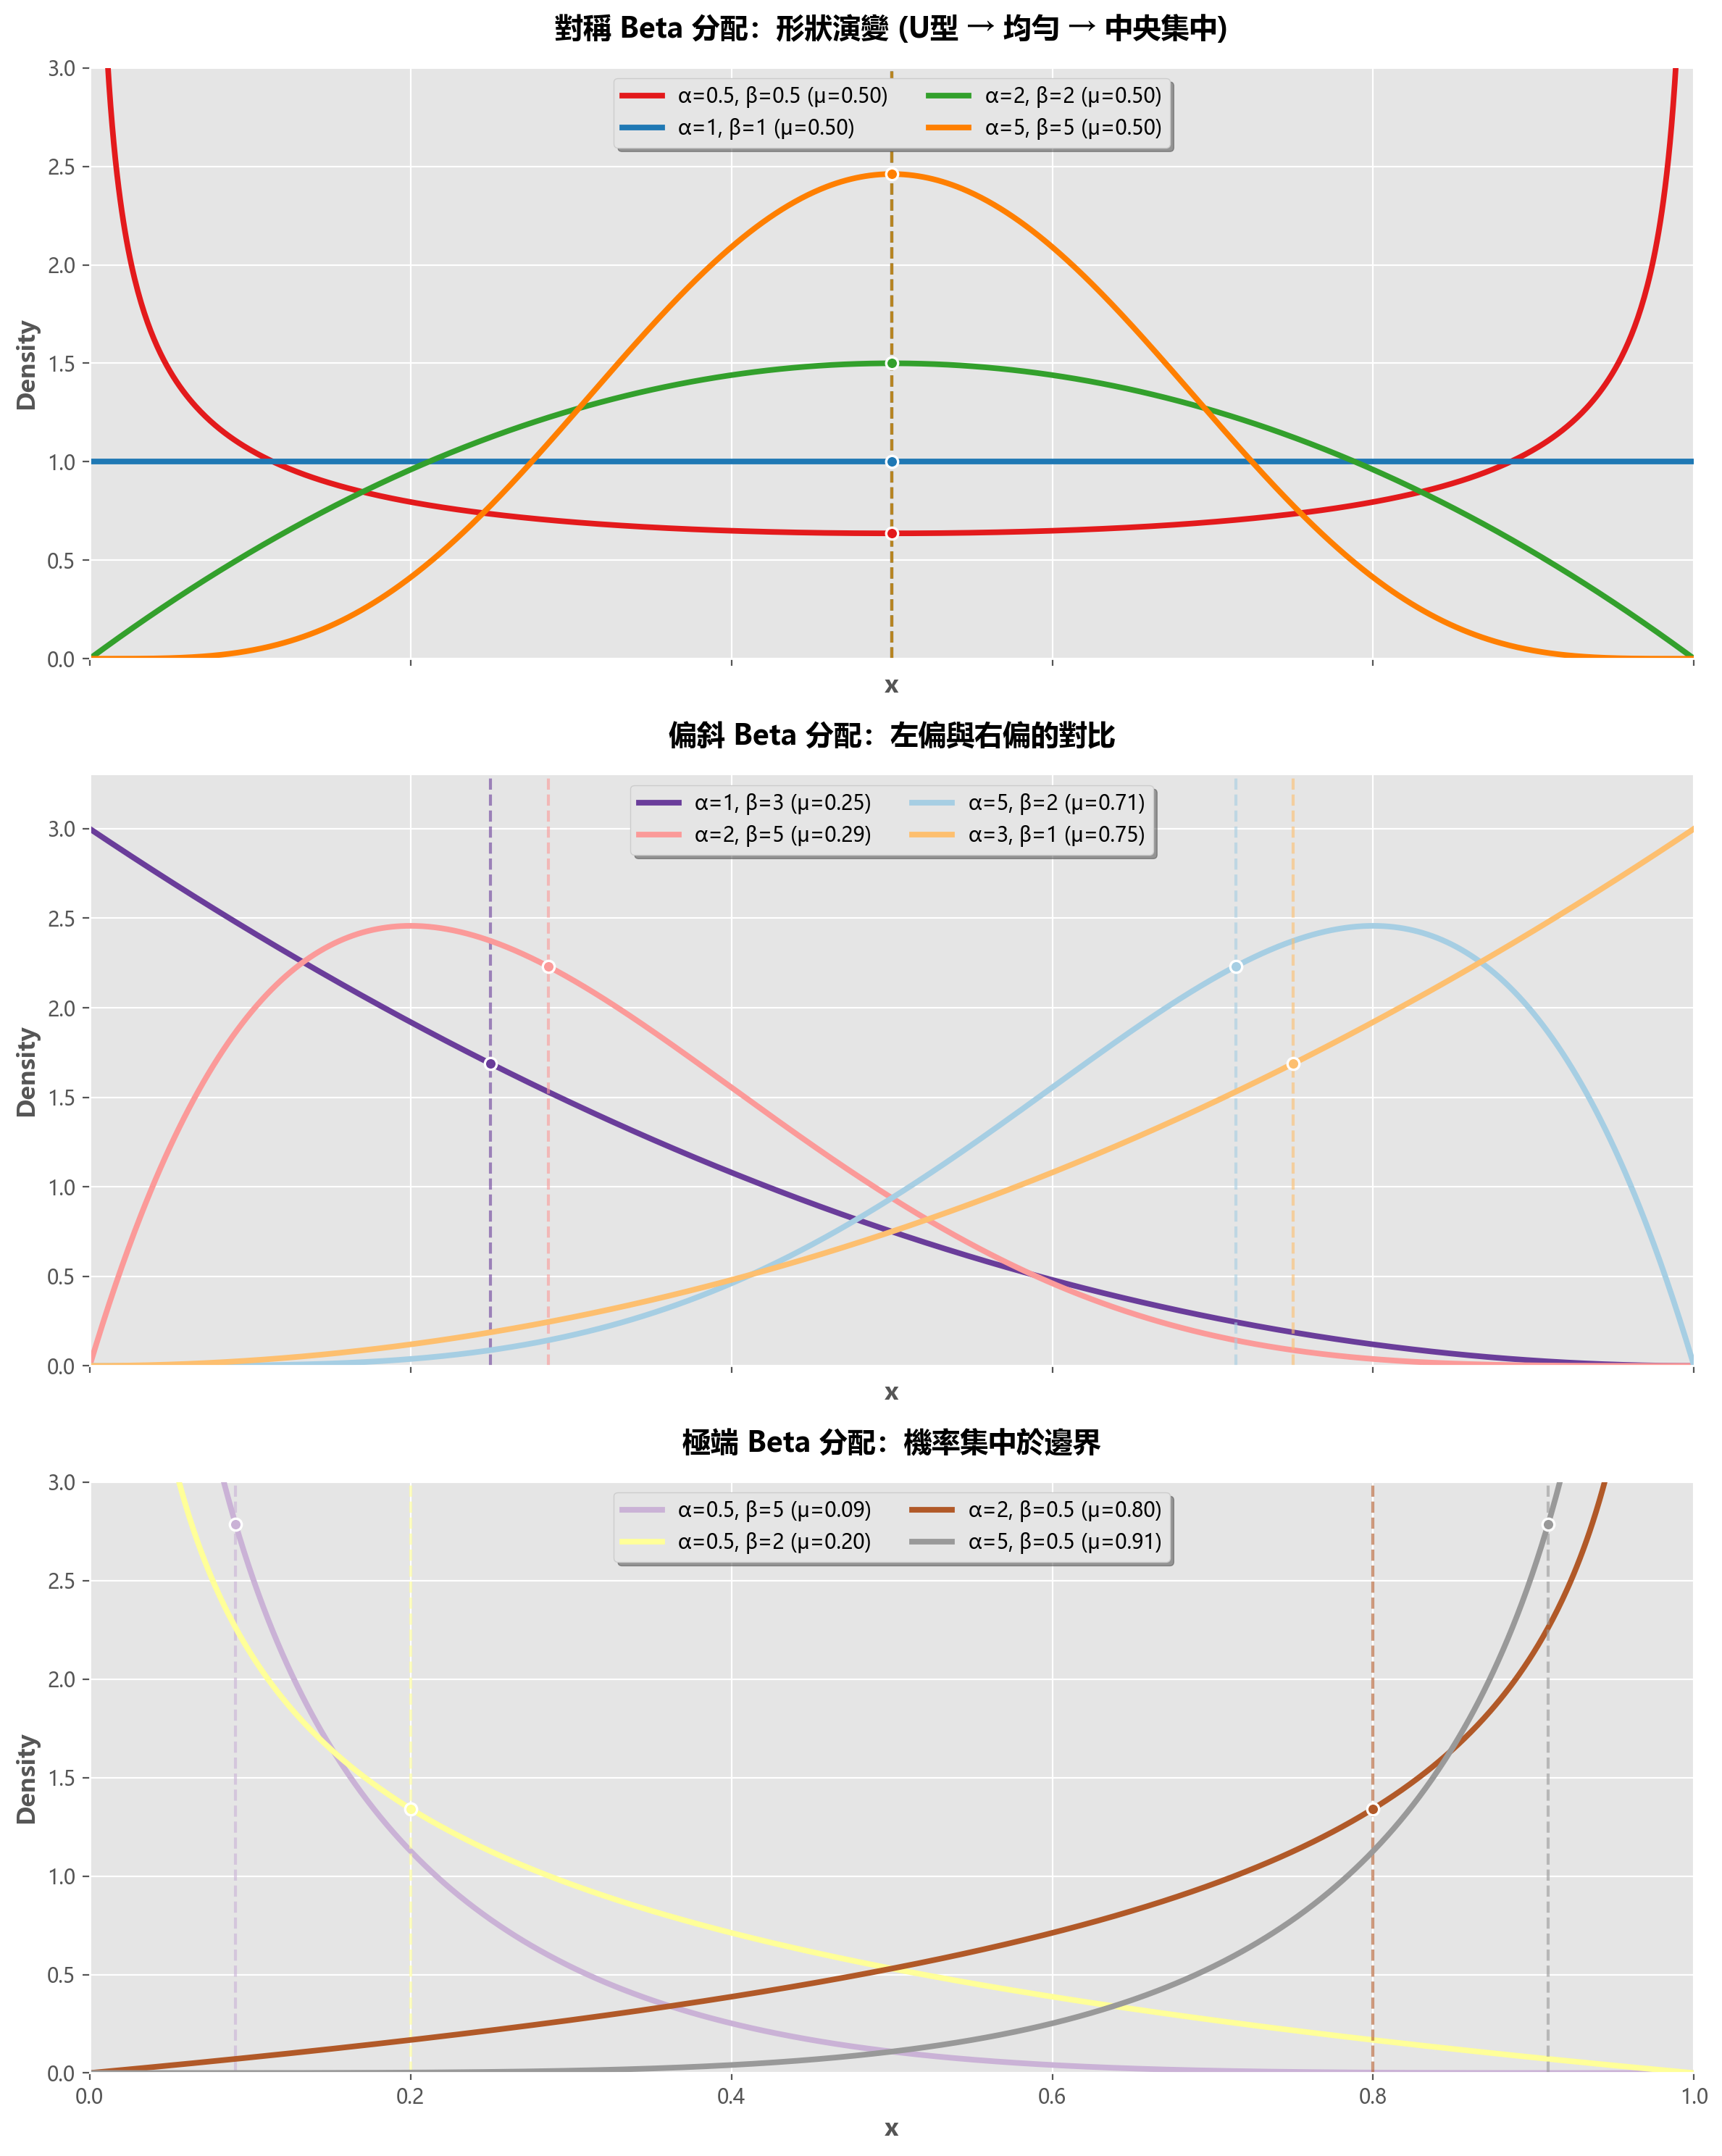

In [11]:
# 使用 ggplot 風格繪製 Beta Distribution 的各種形狀
plt.style.use('ggplot')

# 三組要比較的參數（每一張圖都有多組）
symmetric_params = [
    (0.5, 0.5),  # U 型
    (1, 1),      # 均勻分配
    (2, 2),      # 中間凸起
    (5, 5),      # 更集中於中央
]

skewed_params = [
    (1, 3),  # 右偏（峰靠左）
    (2, 5),  # 右偏、較集中
    (5, 2),  # 左偏、較集中
    (3, 1),  # 左偏、較分散
]

extreme_params = [
    (0.5, 5),  # 極右偏
    (0.5, 2),  # 較右偏
    (2, 0.5),  # 較左偏
    (5, 0.5),  # 極左偏
]

x = np.linspace(0, 1, 1000)

def plot_beta_group(ax, params, title, colors):
    """繪製一組 Beta 分配的子圖"""
    ymax = 0.0
    
    for i, (a, b) in enumerate(params):
        y = stats.beta.pdf(x, a, b)
        mu = a / (a + b)
        
        # 主曲線
        line, = ax.plot(x, y, color=colors[i], linewidth=2.8,
                        label=rf"α={a}, β={b} (μ={mu:.2f})")
        
        # 均值虛線（與曲線同色，但更透明）
        ax.axvline(mu, linestyle='--', linewidth=1.5, alpha=0.6, color=colors[i])
        
        # 均值點標記
        ax.scatter(mu, stats.beta.pdf(mu, a, b), color=colors[i], s=35, 
                   edgecolors='white', linewidth=1.2, zorder=5)
        
        ymax = max(ymax, y.max())

    # 設定子圖樣式
    ax.set_title(title, fontsize=14, fontweight='bold', pad=15)
    ax.set_xlim(0, 1)
    ax.set_xlabel("x", fontsize=12, fontweight='bold')
    ax.set_ylabel("Density", fontsize=12, fontweight='bold')
    
    # 適當的 y 軸範圍，避免圖形頂到邊界
    if np.isfinite(ymax) and ymax > 0:
        ax.set_ylim(0, ymax * 1.1)
    else:
        ax.set_ylim(0, 3)
    
    # 圖例設定
    ax.legend(frameon=True, fancybox=True, shadow=True, 
              ncol=2, fontsize=10, loc='upper center')
    
    # 移除頂部和右側邊框（ggplot 風格）
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# 建立三個子圖
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# ggplot 風格的調色盤
colors_set1 = ['#E31A1C', '#1F78B4', '#33A02C', '#FF7F00']  # 對稱型
colors_set2 = ['#6A3D9A', '#FB9A99', '#A6CEE3', '#FDBF6F']  # 偏斜型  
colors_set3 = ['#CAB2D6', '#FFFF99', '#B15928', '#999999']  # 極端型

plot_beta_group(axes[0], symmetric_params, 
                "對稱 Beta 分配：形狀演變 (U型 → 均勻 → 中央集中)", colors_set1)
plot_beta_group(axes[1], skewed_params,   
                "偏斜 Beta 分配：左偏與右偏的對比", colors_set2)
plot_beta_group(axes[2], extreme_params,  
                "極端 Beta 分配：機率集中於邊界", colors_set3)

plt.tight_layout()
plt.show()

# 重置樣式
plt.style.use('default')

**<font color=skyblue>注意事項與討論：</font>**

**Beta 分配的特殊性質：**
- **定義域限制**：Beta 分配僅定義於 [0,1] 區間，常用於建模比例、機率或百分比數據
- **參數意義**：α 和 β 控制分配的形狀，μ = α/(α+β) 為期望值
- **形狀多樣性**：可呈現 U型、均勻、單峰、雙峰等多種形狀

**三種典型模式：**
1. **對稱分配**：
   - (0.5, 0.5)：經典 U 型，兩端機率最高
   - (1, 1)：標準均勻分配，所有值等機率
   - (2, 2), (5, 5)：逐漸向中央集中，呈鐘型

2. **偏斜分配**：
   - α > β：左偏，機率集中於較大值 (接近 1)
   - α < β：右偏，機率集中於較小值 (接近 0)
   - 參數差距越大，偏斜程度越明顯

3. **極端分配**：
   - α < 1 或 β < 1：產生 U 型或 J 型分配
   - 機率主要集中在 0 或 1 附近，中間值機率極低

**視覺化技巧：**
- **ggplot 風格**：現代化配色與簡潔邊框設計
- **顏色區分**：每組使用不同調色盤，便於區分類型
- **均值標記**：虛線+散點清楚標示期望值位置
- **分組展示**：三個子圖分別展示不同特性，避免視覺混亂

**實際應用：**
- **品質控制**：產品合格率分配
- **醫學統計**：治療成功率建模
- **市場研究**：消費者偏好比例
- **貝氏統計**：作為共軛先驗分配

<hr>

1-6 F Distribution
$$
f(x; d_1, d_2) =
\frac{\Gamma\!\left(\frac{d_1+d_2}{2}\right)}
     {\Gamma\!\left(\frac{d_1}{2}\right)\Gamma\!\left(\frac{d_2}{2}\right)}
\left(\frac{d_1}{d_2}\right)^{\frac{d_1}{2}}
x^{\frac{d_1}{2}-1}
\left(1+\frac{d_1}{d_2}x\right)^{-\frac{d_1+d_2}{2}},
\quad x > 0
$$

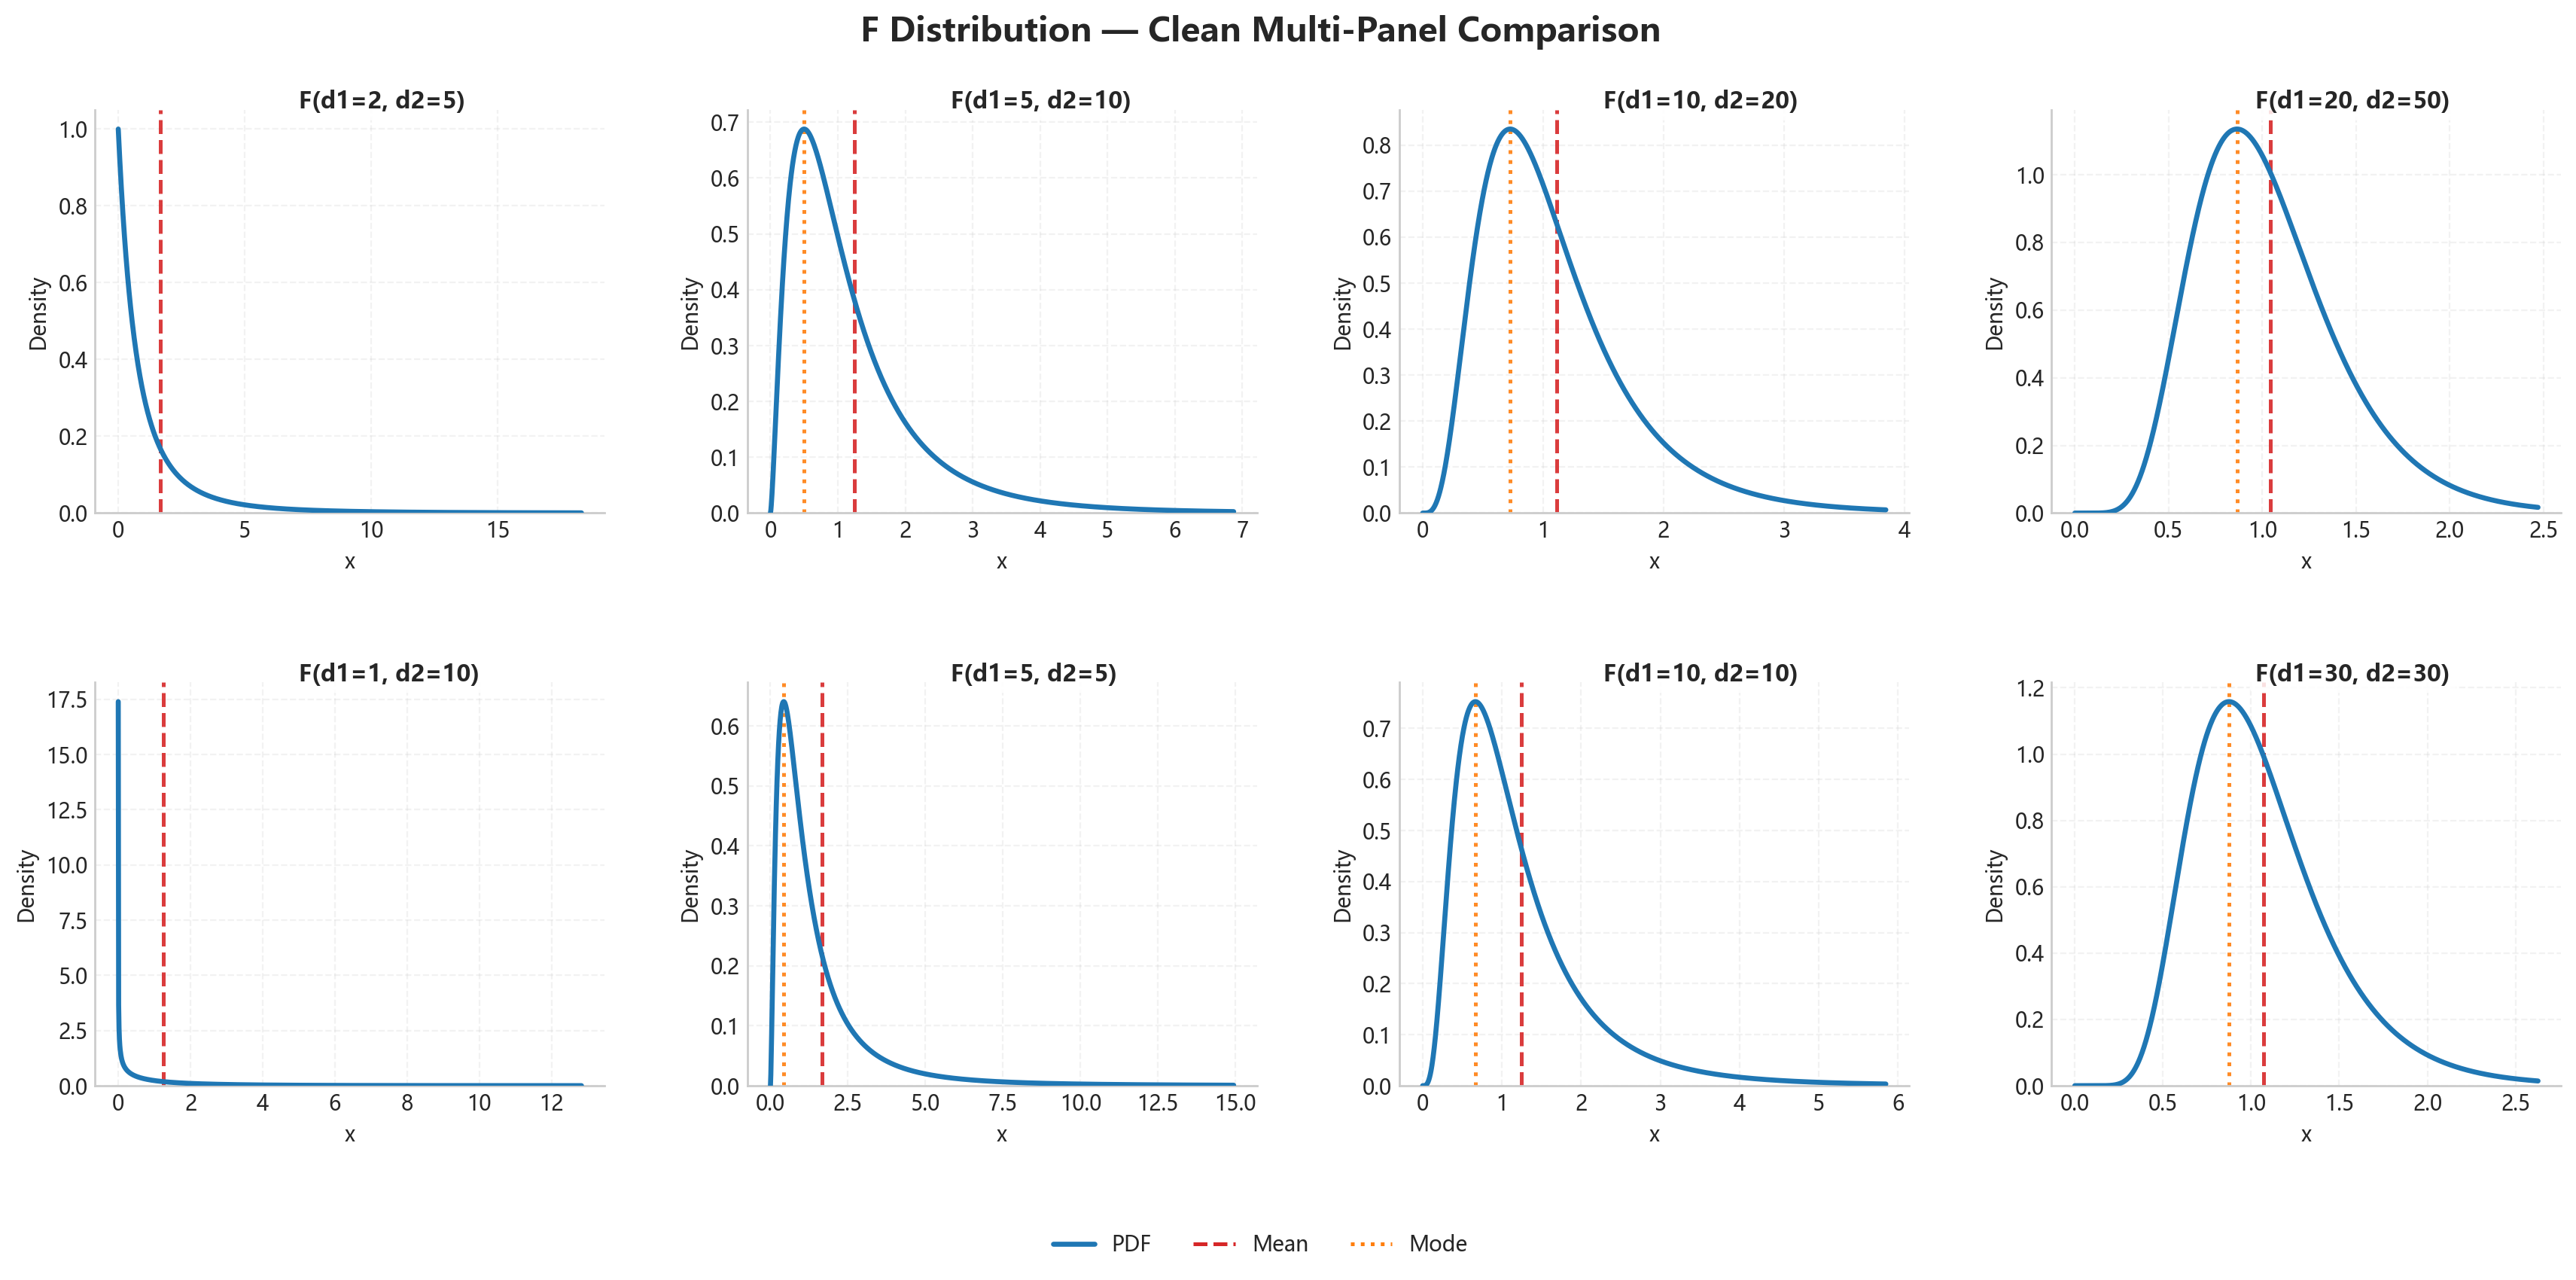

In [31]:
from scipy.stats import f

# 風格與字型
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

pdf_color  = '#1f77b4'
mean_color = '#d62728'
mode_color = '#ff7f0e'

param_sets = [
    (2, 5), (5, 10), (10, 20), (20, 50),
    (1, 10), (5, 5), (10, 10), (30, 30)
]

# 關閉 constrained_layout，手動調整間距
fig, axes = plt.subplots(2, 4, figsize=(18, 9), constrained_layout=False)
axes = axes.flatten()
plt.subplots_adjust(top=0.88, bottom=0.16, left=0.07, right=0.98,
                    hspace=0.42, wspace=0.28)

# 代理線：全域圖例用
pdf_proxy,  = plt.plot([], [], color=pdf_color,  linewidth=2.4, label='PDF')
mean_proxy, = plt.plot([], [], color=mean_color, linestyle='--', linewidth=1.8, label='Mean')
mode_proxy, = plt.plot([], [], color=mode_color, linestyle=':',  linewidth=1.8, label='Mode')

for ax, (d1, d2) in zip(axes, param_sets):
    # 用分位數裁尾，避免擠壓
    try:
        x_max = float(f.ppf(0.995, d1, d2))
        if not np.isfinite(x_max) or x_max <= 0: x_max = 8.0
    except Exception:
        x_max = 8.0

    x = np.linspace(5e-4, x_max, 1200)
    y = f.pdf(x, d1, d2)
    ax.plot(x, y, color=pdf_color, linewidth=2.4, zorder=3)

    # 均值（d2>2）
    if d2 > 2:
        mu = d2 / (d2 - 2)
        if mu <= x_max:
            ax.axvline(mu, color=mean_color, linestyle='--', linewidth=1.8, alpha=0.9, zorder=2)

    # 眾數（d1>2）
    if d1 > 2:
        mode = (d1 - 2) / d1 * (d2 / (d2 + 2))
        if 0 < mode <= x_max:
            ax.axvline(mode, color=mode_color, linestyle=':', linewidth=1.8, alpha=0.9, zorder=2)

    # 把每格標題改成「內嵌小標籤」，騰出上方空間
    ax.text(0.4, 1.05, f'F(d1={d1}, d2={d2})',
            transform=ax.transAxes, ha='left', va='top',
            fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.25', facecolor='white', alpha=0.85, edgecolor='none'))

    # 視覺清理
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.25)

    y_max = np.nanmax(y[np.isfinite(y)]) if np.isfinite(y).any() else 1.0
    ax.set_ylim(0, y_max * 1.05)

# 全域標題與圖例位置：標題在上、圖例移到下方中央
fig.suptitle('F Distribution — Clean Multi-Panel Comparison',
             fontsize=16, fontweight='bold', y=0.95)
fig.legend(handles=[pdf_proxy, mean_proxy, mode_proxy],
           loc='lower center', bbox_to_anchor=(0.5, 0.02),
           ncol=3, frameon=False)

plt.show()

# 可選：恢復預設
plt.style.use('default')
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

**<font color=skyblue>F 分配靜態圖表注意事項與討論：**

**</font>圖表特色：**
- 展示 8 種不同參數組合的 F 分配，涵蓋典型應用場景
- 每個子圖都包含主曲線、均值線（虛線）、眾數線（點線）
- 右上角顯示關鍵統計量：均值、眾數、變異數

**參數組合分析：**
- **(2, 5), (1, 10)**：小自由度情況，分配呈 J 型或極右偏
- **(5, 10), (10, 20)**：中等自由度，典型的右偏鐘型分配  
- **(20, 50), (30, 30)**：大自由度，趨近常態分配
- **(5, 5), (10, 10)**：對稱自由度，觀察 d1=d2 時的特殊性質

**統計量存在條件：**
- 均值存在條件：d2 > 2，否則顯示「不存在」
- 眾數存在條件：d1 > 2，否則眾數為 0
- 變異數存在條件：d2 > 4，否則顯示「不存在」

**F 分配的數學性質：**
- **定義域**：F 分配僅定義於 x > 0，是兩個卡方分配比值的結果
- **參數意義**：d1 (分子自由度) 和 d2 (分母自由度) 分別對應兩個獨立卡方變數的自由度
- **均值公式**：當 d2 > 2 時，E[F] = d2/(d2-2)
- **眾數公式**：當 d1 > 2 時，Mode = (d1-2)/d1 × d2/(d2+2)
- **變異數公式**：當 d2 > 4 時，Var[F] = 2d2²(d1+d2-2)/[d1(d2-2)²(d2-4)]

**分配形狀演變規律：**
1. **小自由度效應**：
   - d1 ≤ 2：分配呈 J 型，從 x=0 開始單調遞減
   - d2 ≤ 2：均值不存在，分配具有厚尾特性
   - d2 ≤ 4：變異數不存在，分配變異性極大

2. **自由度增大趨勢**：
   - 隨著 d1, d2 增大，分配逐漸趨近常態分配
   - 當兩個自由度都很大時，F 分配近似 N(1, 2/d1)

3. **對稱性觀察**：
   - F(d1,d2) 與 1/F(d2,d1) 有特殊關係
   - 當 d1 = d2 時，分配關於某點呈近似對稱

**統計應用場景：**
- **ANOVA 檢定**：F(k-1, n-k) 用於檢驗 k 組均值是否相等
- **回歸分析**：F(p, n-p-1) 用於檢驗回歸模型整體顯著性
- **變異數比檢定**：F(n1-1, n2-1) 用於比較兩組變異數
- **品質管制**：監控製程變異是否穩定



<hr>

**<font color=darkgoldenrod>2：繪製隨機亂數相關圖形</font>**

2-1. 從常態分配抽取隨機亂數並繪製直方圖（Histogram）、盒鬚圖（Boxplot）、常態機率圖（Q-Q plot）、經驗累積機率函數（ECDF）

- 樣本數 $n = 1000$
- 以副程式呈現（必要時）

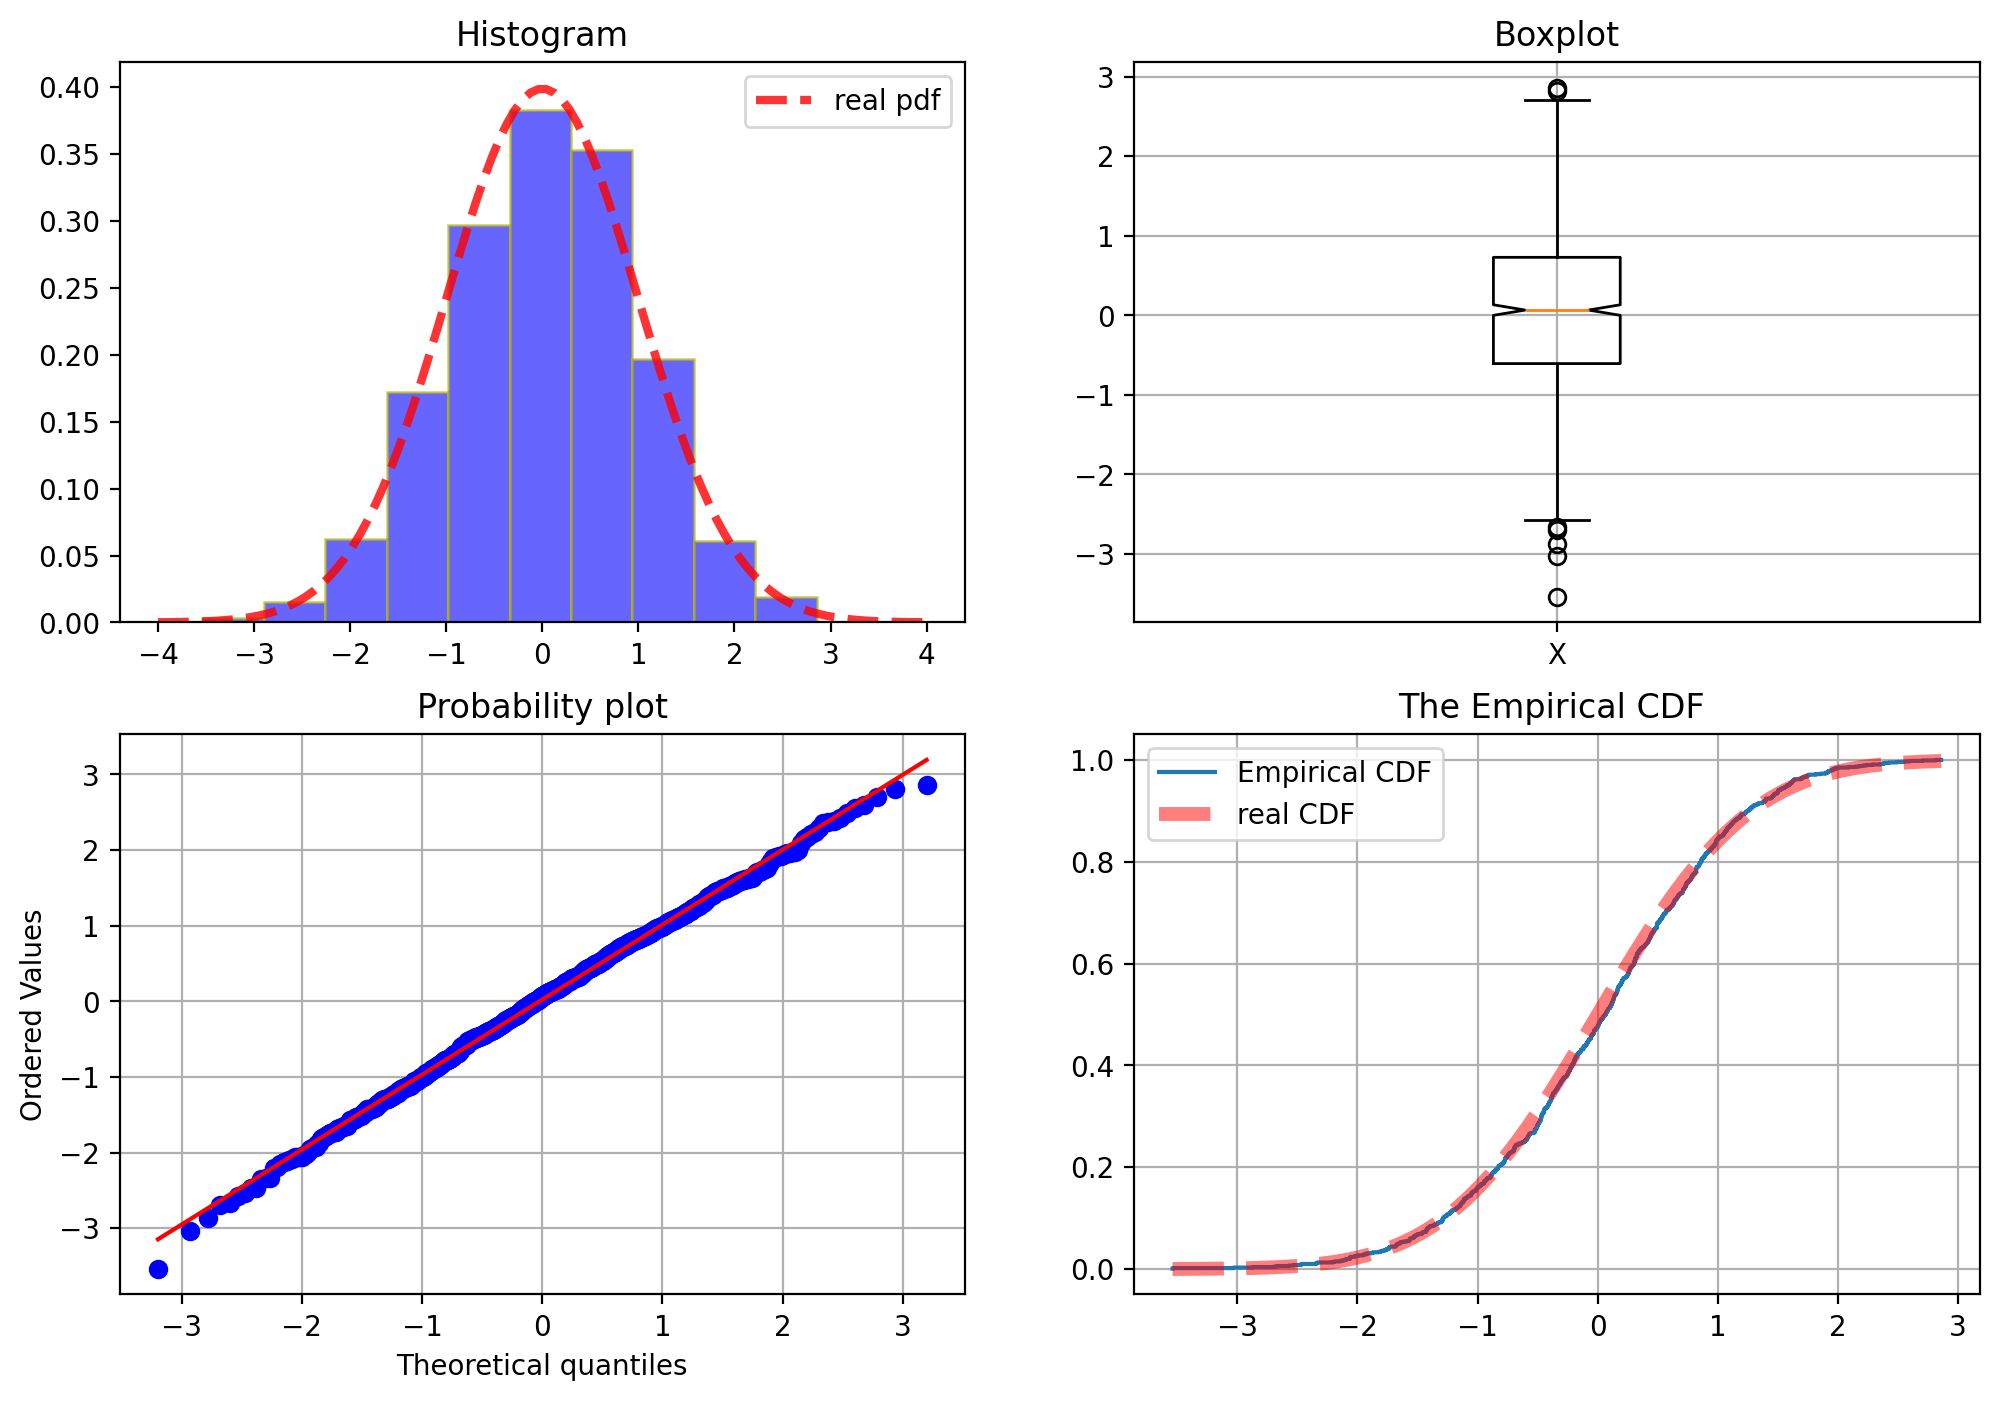

In [46]:
n = 1000
x = stats.norm.rvs(size = n)
fig, ax = plt.subplots(2, 2, figsize = (12, 8))
# 直方圖
ax[0,0].hist(x, bins = 10, density = True, alpha = 0.6,\
              color = 'b', edgecolor = 'y', linewidth = 1)
xx= np.linspace(-4, 4, 100)
yy = stats.norm.pdf(xx)
ax[0,0].plot(xx, yy, color = 'r', linestyle = '--', \
             linewidth = 3, alpha = 0.8, label = 'real pdf')
ax[0,0].legend()
ax[0,0].set_title('Histogram')
# 盒鬚圖
ax[0,1].boxplot(x, notch=True, vert=True, tick_labels=['X'])
ax[0,1].grid(True)
ax[0,1].set_title('Boxplot')
# 機率圖
stats.probplot(x, dist = "norm", plot = ax[1,0])
ax[1,0].grid(True)
ax[1,0].set_title('Probability plot')
# 經驗累積密度函數
x = np.sort(x)
Y = np.arange(1, n+1) / n
ax[1,1].plot(x, Y, drawstyle = 'steps-pre', label = 'Empirical CDF')
Y_ = stats.norm.cdf(x)
ax[1,1].plot(x, Y_, color = 'r', linestyle = '--',
    linewidth = 5, alpha = 0.5, label = 'real CDF')
ax[1,1].legend(), ax[1,1].grid(True)
ax[1,1].set_title('The Empirical CDF ')
plt.show()

**<font color=skyblue>注意事項與討論：</font>**
- 上圖呈現 1000 個隨機亂數的四種圖形，其中直方圖與經驗累積機率圖同時繪製其來源母體的 PDF 及 CDF 函數供比較。
- 若樣本數變少，譬如 10 或 100，圖形會有所不同，譬如下圖：<font color=orange>請注意：若欲進一步呈現不同樣本數的圖形，請自行修改程式碼並繪製。此時最好將上述程式碼改為副程式，呼叫時帶入樣本數為參數以節省程式碼空間。</font>

<hr>

2-2. 從 T 分配抽取隨機亂數並繪製直方圖（Histogram）、盒鬚圖（Boxplot）、常態機率圖（Q-Q plot）、經驗累積機率函數（ECDF）

- 樣本數 $n = 2000$
- 自由度 df = 5

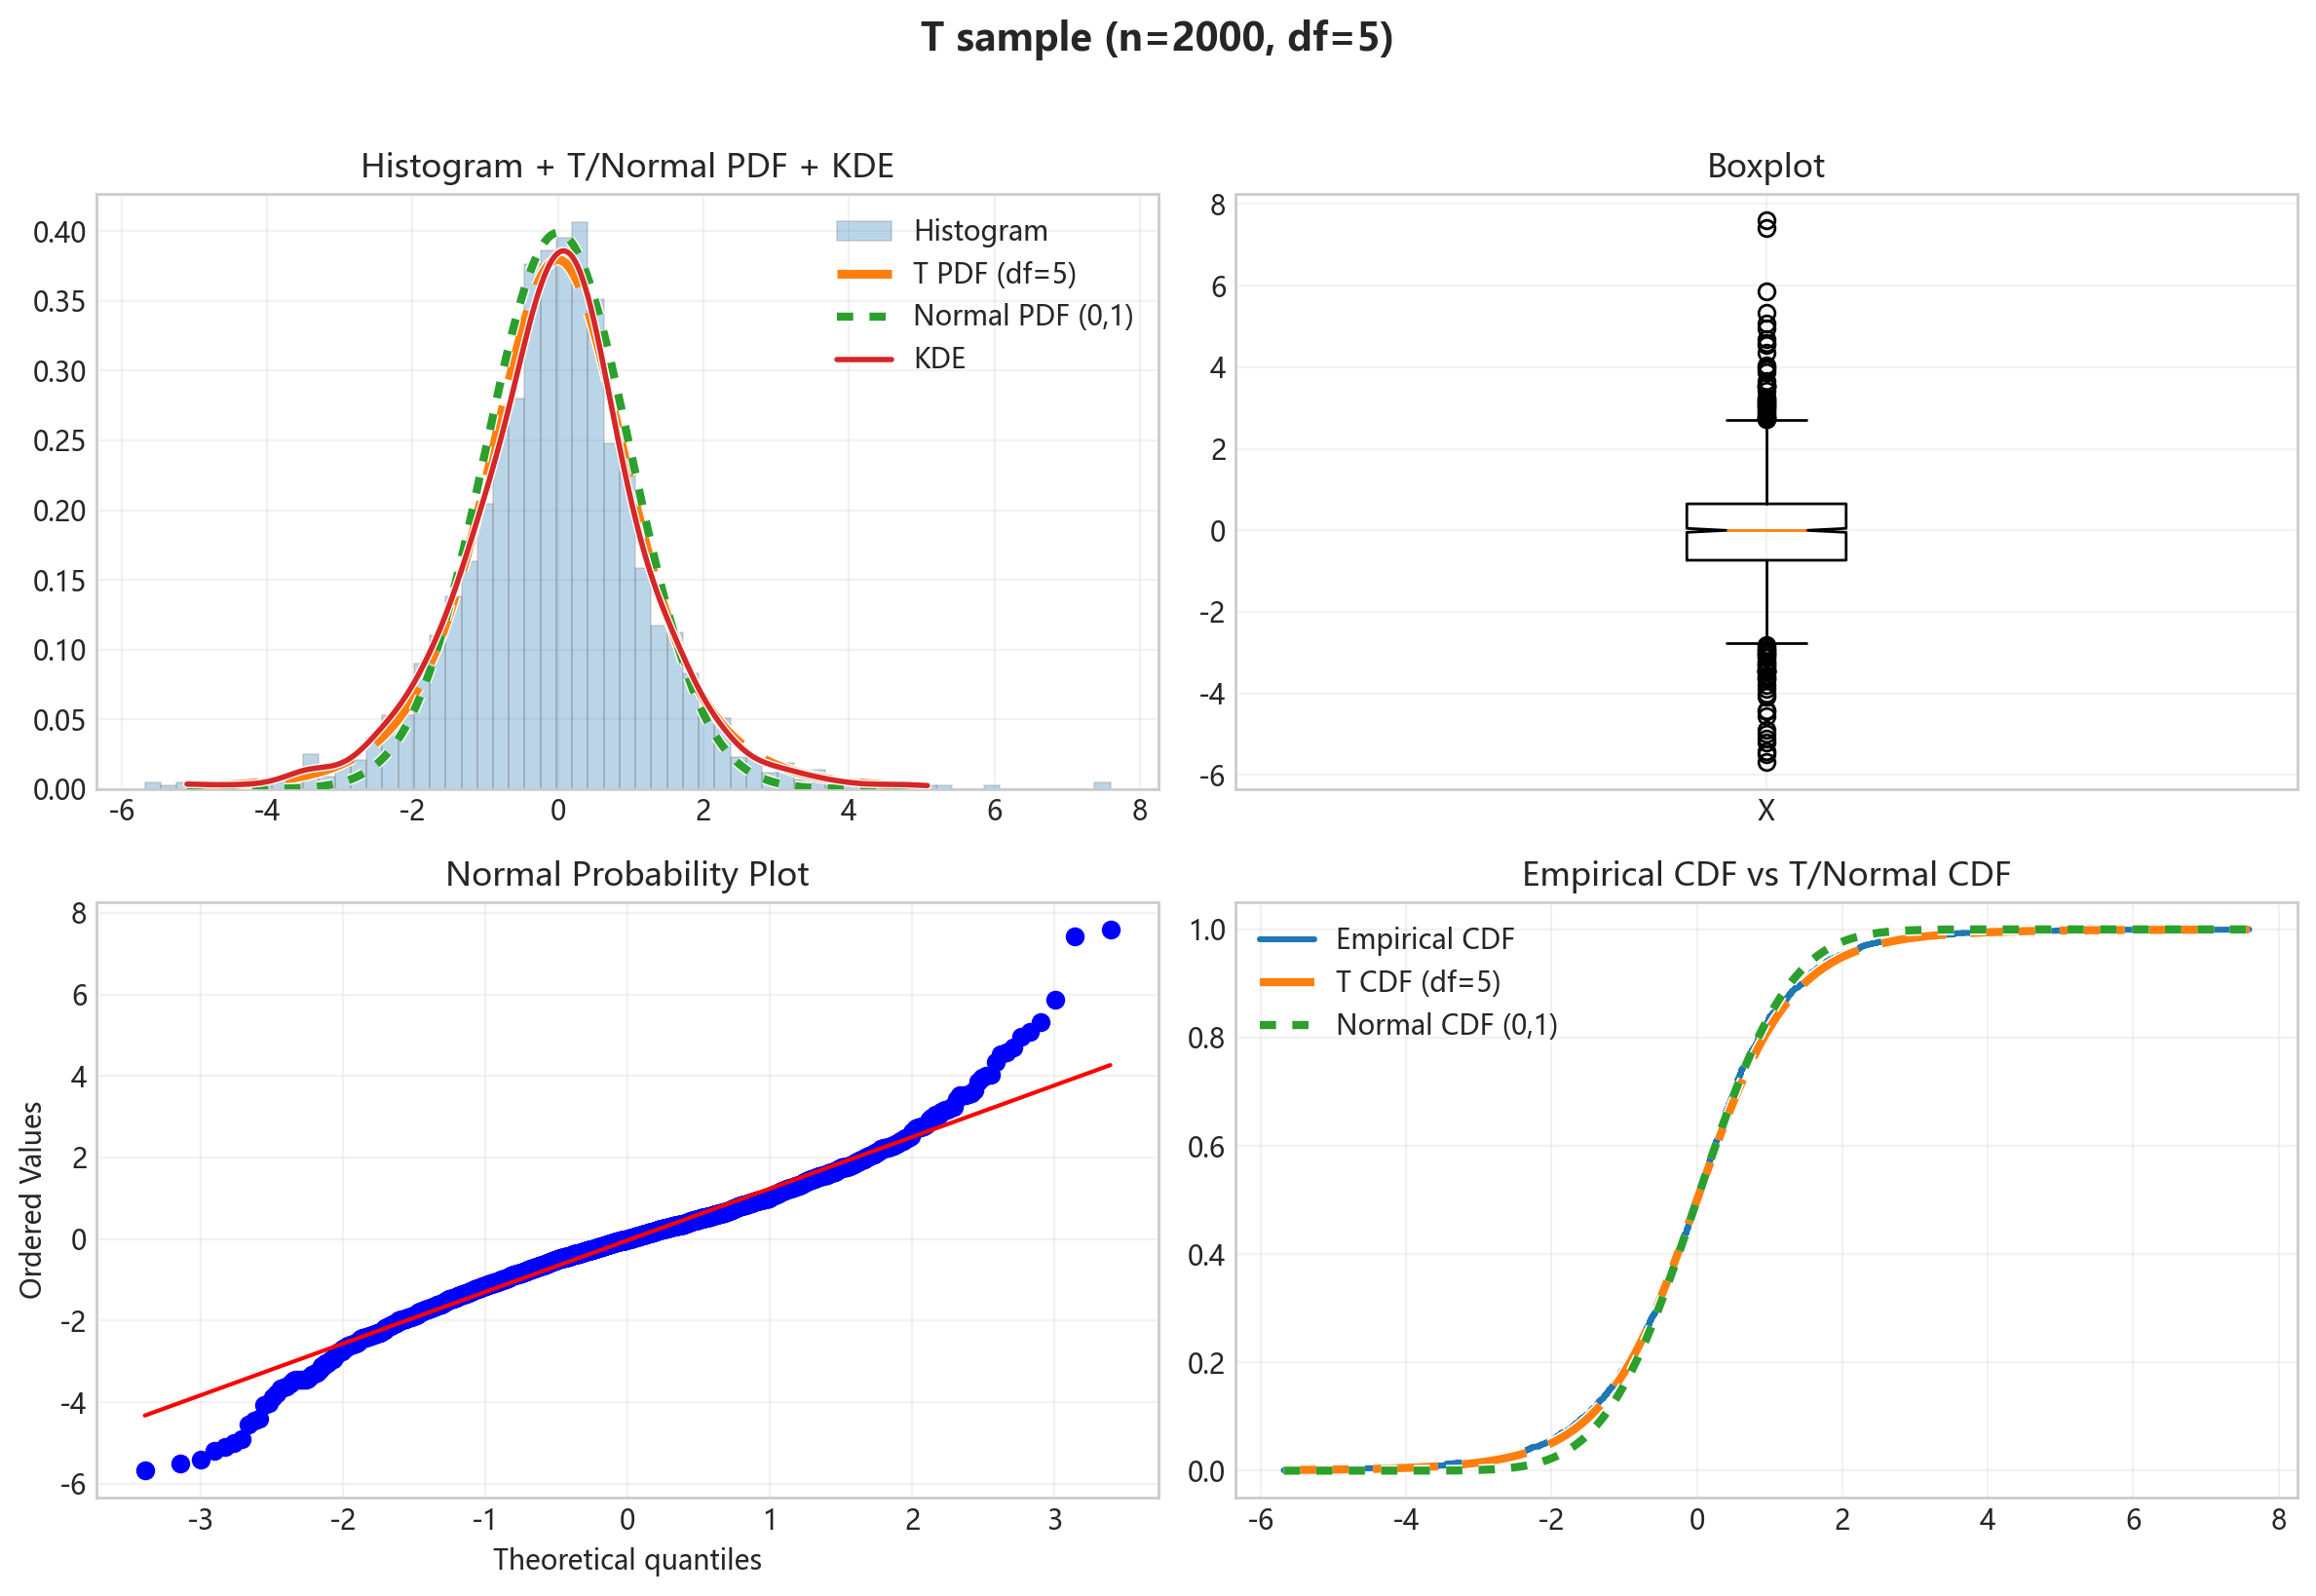

In [63]:
n, df, seed = 2000, 5, 42
rng = np.random.default_rng(seed)
x = stats.t.rvs(df=df, size=n, random_state=rng)

# ===== 風格 =====
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# ===== 直方圖 + T/Normal PDF + KDE（線條強化）=====
# 自動 bins（Freedman–Diaconis）
q75, q25 = np.percentile(x, [75, 25])
iqr = max(q75 - q25, 1e-12)
bw = 2 * iqr / (n ** (1/3))
bins = int(np.clip(np.ceil((x.max() - x.min()) / bw), 10, 200)) if bw > 0 else 30

# 直方圖放後面、低透明，避免壓住線
ax[0,0].hist(x, bins=bins, density=True, alpha=0.30,
             edgecolor='grey', linewidth=0.6, zorder=1, label='Histogram')

# 平滑網格（避免重尾擠壓）
xx = np.linspace(np.percentile(x, 0.2), np.percentile(x, 99.8), 500)

# 疊 T/Normal PDF + KDE
l_t,   = ax[0,0].plot(xx, stats.t.pdf(xx, df),   lw=3.3, ls=(0,(8,3)),  zorder=3, label=f'T PDF (df={df})')
l_n,   = ax[0,0].plot(xx, stats.norm.pdf(xx),    lw=3.0, ls=(0,(2,2)),  zorder=3, label='Normal PDF (0,1)')
kde    = stats.gaussian_kde(x)
l_kde, = ax[0,0].plot(xx, kde(xx),               lw=2.0, ls='-',        zorder=3, label='KDE')

# 給所有線加白色描邊：重疊或壓到直方圖時仍清楚
for ln in (l_t, l_n, l_kde):
    ln.set_path_effects([
        pe.Stroke(linewidth=ln.get_linewidth()+1.0, foreground='white'),
        pe.Normal()
    ])

ax[0,0].set_title('Histogram + T/Normal PDF + KDE')
ax[0,0].legend(frameon=False)
ax[0,0].grid(True, alpha=0.25)

# ===== 盒鬚圖 =====
ax[0,1].boxplot(x, notch=True, vert=True, tick_labels=['X'])
ax[0,1].set_title('Boxplot')
ax[0,1].grid(True, alpha=0.25)

# ===== 常態機率圖（Normal QQ）=====
stats.probplot(x, dist='norm', plot=ax[1,0])
ax[1,0].set_title('Normal Probability Plot')
ax[1,0].grid(True, alpha=0.25)

# ===== ECDF vs T/Normal CDF（線條強化、樣式區分）=====
xs = np.sort(x)
ecdf = np.arange(1, n + 1) / n
ax[1,1].plot(xs, ecdf, drawstyle='steps-pre', lw=2.2, zorder=2, label='Empirical CDF')

l_ct, = ax[1,1].plot(xs, stats.t.cdf(xs, df),   lw=3.0, ls=(0,(8,3)),  zorder=3, label=f'T CDF (df={df})')
l_cn, = ax[1,1].plot(xs, stats.norm.cdf(xs),    lw=3.0, ls=(0,(2,2)),  zorder=3, label='Normal CDF (0,1)')
for ln in (l_ct, l_cn):
    ln.set_path_effects([
        pe.Stroke(linewidth=ln.get_linewidth()+1.2, foreground='white'),
        pe.Normal()
    ])

ax[1,1].set_title('Empirical CDF vs T/Normal CDF')
ax[1,1].legend(frameon=False)
ax[1,1].grid(True, alpha=0.25)

fig.suptitle(f'T sample (n={n}, df={df})', y=1.02,
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**<font color=skyblue>注意事項與討論：</font>**

**繪圖技術與設計重點：**

- KDE（核密度估計）可視覺化樣本的平滑分布，補足直方圖的粗糙感。

- Normal QQ plot 檢查樣本是否近似常態分布，點落在直線上表示分布吻合，若偏離則顯示重尾或偏態。

- ECDF 同時疊加 T 分配 CDF、常態分配 CDF，便於檢查樣本累積分布與理論分布的吻合度。

- 線條加白色描邊，確保重疊時仍清楚可辨。

- 直方圖 bins 採用 Freedman–Diaconis 規則自動計算，兼顧分布型態與細節。

- seaborn 風格、中文字型設定，確保圖形美觀且支援中文。

**統計上的意義補充：**

- T 分配適用於小樣本且母體標準差未知的情境，重尾特性使其比常態分配更能反映極端值。

- 直方圖與 KDE 可視覺化樣本的集中趨勢、偏態與重尾現象，協助判斷資料分布型態。

- 疊加常態分配 PDF/CDF，便於比較 T 分配與常態分配的差異，尤其在 df 較小時，T 分配尾部較厚。

- Normal QQ plot 可檢查樣本是否服從常態分布，若偏離直線則顯示 T 分配的重尾特性。

- ECDF 與理論 CDF 比較，檢查樣本分布與理論分布的吻合度，樣本數越大，經驗分布越接近理論分布。


2- 從 Chi-square 分配抽取隨機亂數並繪製直方圖（Histogram）、盒鬚圖（Boxplot）、常態機率圖（Q-Q plot）、經驗累積機率函數（ECDF）

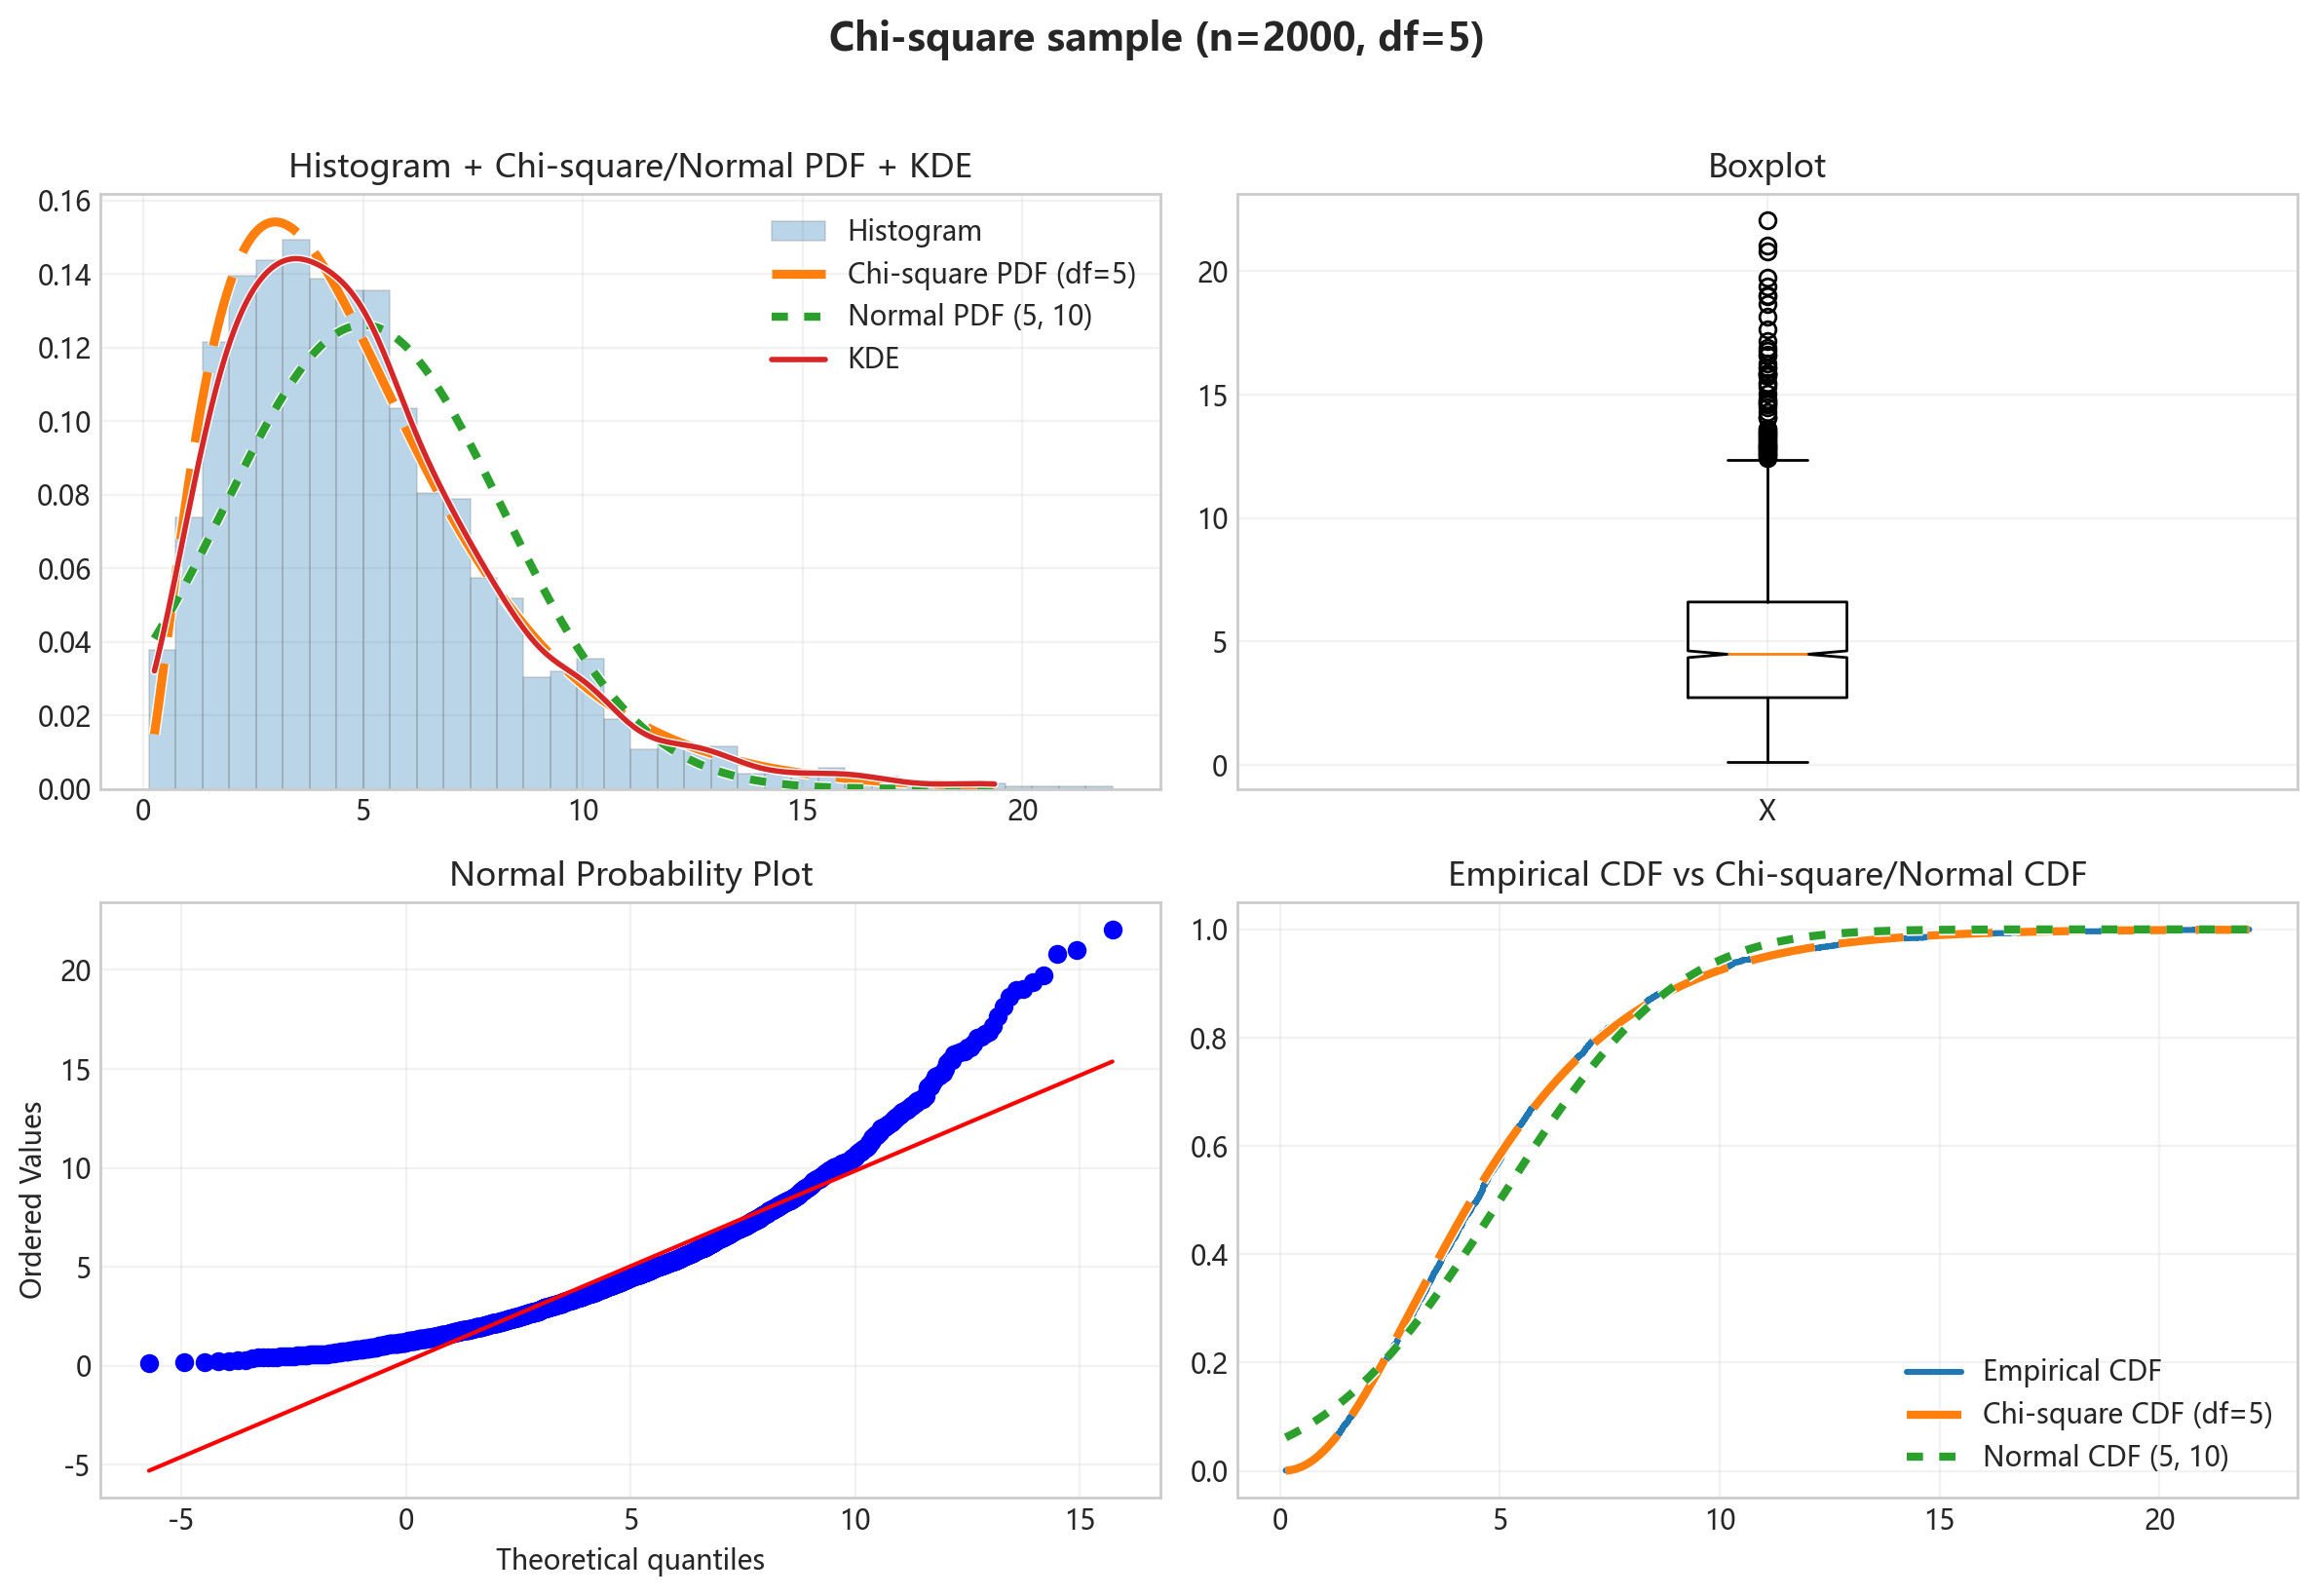

In [64]:
#從 Chi-square 分配抽取隨機亂數並繪製直方圖（Histogram）、盒鬚圖（Boxplot）、常態機率圖（Q-Q plot）、經驗累積機率函數（ECDF）
n, df, seed = 2000, 5, 42
rng = np.random.default_rng(seed)
x = stats.chi2.rvs(df=df, size=n, random_state=rng)
import matplotlib.patheffects as pe
# ===== 風格 =====
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
# ===== 直方圖 + Chi-square/Normal PDF + KDE（線條強化）=====
# 自動 bins（Freedman–Diaconis）
q75, q25 = np.percentile(x, [75, 25])
iqr = max(q75 - q25, 1e-12)
bw = 2 * iqr / (n ** (1/3))
bins = int(np.clip(np.ceil((x.max() - x.min()) / bw), 10, 200)) if bw > 0 else 30
# 直方圖放後面、低透明，避免壓住線
ax[0,0].hist(x, bins=bins, density=True, alpha=0.30,
             edgecolor='grey', linewidth=0.6, zorder=1, label='Histogram')
# 平滑網格（避免重尾擠壓）
xx = np.linspace(np.percentile(x, 0.2), np.percentile(x, 99.8), 500)
# 疊 Chi-square/Normal PDF + KDE
l_chi, = ax[0,0].plot(xx, stats.chi2.pdf(xx, df), lw=3.3, ls=(0,(8,3)), zorder=3, label=f'Chi-square PDF (df={df})')
l_n,   = ax[0,0].plot(xx, stats.norm.pdf(xx, df, np.sqrt(2*df)), lw=3.0, ls=(0,(2,2)), zorder=3, label=f'Normal PDF ({df}, {2*df})')
kde    = stats.gaussian_kde(x)
l_kde, = ax[0,0].plot(xx, kde(xx),               lw=2.0, ls='-',        zorder=3, label='KDE')
# 給所有線加白色描邊：重疊或壓到
for ln in (l_chi, l_n, l_kde):
    ln.set_path_effects([
        pe.Stroke(linewidth=ln.get_linewidth()+1.0, foreground='white'),
        pe.Normal()
    ])
ax[0,0].set_title('Histogram + Chi-square/Normal PDF + KDE')
ax[0,0].legend(frameon=False)
ax[0,0].grid(True, alpha=0.25)
# ===== 盒鬚圖 =====
ax[0,1].boxplot(x, notch=True, vert=True, tick_labels=['X'])
ax[0,1].set_title('Boxplot')
ax[0,1].grid(True, alpha=0.25)
# ===== 常態機率圖（Normal QQ）=====
stats.probplot(x, dist='norm', sparams=(df, np.sqrt(2*df)), plot=ax[1,0])
ax[1,0].set_title('Normal Probability Plot')

ax[1,0].grid(True, alpha=0.25)
# ===== ECDF vs Chi-square/Normal CDF（線條強化、樣式區分）=====
xs = np.sort(x)
ecdf = np.arange(1, n + 1) / n
ax[1,1].plot(xs, ecdf, drawstyle='steps-pre', lw=2.2, zorder=2, label='Empirical CDF')
l_cchi, = ax[1,1].plot(xs, stats.chi2.cdf(xs, df),   lw=3.0, ls=(0,(8,3)),  zorder=3, label=f'Chi-square CDF (df={df})')
l_cn,  = ax[1,1].plot(xs, stats.norm.cdf(xs, df, np.sqrt(2*df)),    lw=3.0, ls=(0,(2,2)),  zorder=3, label=f'Normal CDF ({df}, {2*df})')
for ln in (l_cchi, l_cn):
    ln.set_path_effects([
        pe.Stroke(linewidth=ln.get_linewidth()+1.2, foreground='white'),
        pe.Normal()
    ])
ax[1,1].set_title('Empirical CDF vs Chi-square/Normal CDF')
ax[1,1].legend(frameon=False)
ax[1,1].grid(True, alpha=0.25)
fig.suptitle(f'Chi-square sample (n={n}, df={df})', y=1.02,
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


**<font color=skyblue>注意事項與討論：</font>**

- 樣本數 n=2000 屬於中等規模，能有效呈現卡方分布的偏態特性。若 n 太小，圖形可能受隨機波動影響較大。
  卡方分布的特性

- 卡方分布（df=5）為右偏分布，容易出現極端大值，直方圖與盒鬚圖可明顯看出分布偏態與長尾現象。
  理論均值為 df，理論變異數為 2*df，程式中常態分布用這兩個參數做比較。
  直方圖與 KDE、PDF 疊加

- 以理論常態分布（均值=df，標準差=sqrt(2*df)）為基準，檢查樣本是否近似常態。
  卡方分布 df 越大越接近常態，但 df=5 時仍明顯偏態，QQ plot 點分布會偏離對角線。
  經驗累積機率函數（ECDF）與理論 CDF 比較

- 卡方分布極端值多，分析時需注意是否有異常值影響統計量（如平均數、標準差）。

2-4

**<font color=darkgoldenrod>3：繪製抽樣分配</font>**

3-1. 從常態分配抽取隨機亂數並計算平方後繪製相關圖形

假設隨機變數 $Z$ 服從常態分配 $N(0, 1)$，令 $Y = Z^2 $, 則隨機變數 $Y$ 服從 $\chi^2(1)$ 分配自由度為 1。本節藉由隨機抽樣來證實這個知名的定理。做法如下：

1. 從常態分配 $N(0, 1)$ 隨機抽取 n 個樣本，並計算每個樣本的平方。

1. 繪製上述樣本平方的直方圖並與真實的 $\chi^2(1)$ PDF 圖比較）。

1. 同時繪製 Boxplot, Probability plot 與 ECDF，其中 ECDF 圖加入真實 CDF 圖。
1. 留意樣本數對圖形的影響。

<hr>

**<font color=darkorange>結論：</font>**
- 透過本次作業，我們深入了解了各種隨機變數的分配特性，並學會了如何利用 Python 繪製相關圖形以進行視覺化分析。
- 、、、